<h1 style="text-align: center;" class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-
controls="home">BANK MARKETING ANALYSIS</h1>

# Importing Data
The dataset used for model building contained 11162 observations of 17 variables.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import confusion_matrix
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve

In [2]:
df = pd.read_csv(r'C:\BIA\Spinnaker Project 2\bank.csv')

# The dataset contains the following attributes:
<li>1 - Age: The age of the customer. (Numerical)</li>
<li>2 - Job: The occupation/employment status of the customer. (Categorical)</li>
<li>3 - Marital Status: The marital status of the customer. (Categorical)</li>
<li>4 - Education: Represents the educational level of the person (e.g., primary, secondary, tertiary).</li>
<li>5 - Default: Whether the customer has credit in default or not. (Categorical)</li>
<li>6 - Balance: The balance in the customer's account. (Numerical)</li>
<li>7 - Housing: has housing loan? </li>
<li>8 - loan: has personal loan?</li>
<li>9 - Contact: Describes the method of communication used to contact the person (telephone, cellular, unknown.). (Categorical)</li>
<li>10 - Day: Indicates the day of the week of the last contact.</li>
<li>11 - Month: Represents the month of the last contact.</li>
<li>12 - Duration: Represents the duration of the last contact in seconds</li>
<li>13 - campaign: Indicates the number of contacts made during this campaign.</li>
<li>14 - pdays:	Describes the number of days since the person was last contacted or -1 if they were not previously contacted.</li>
<li>15 - previous: Represents the number of contacts made before this campaign.</li>
<li>16 - poutcome: Indicates the outcome of the previous marketing campaign.</li>
<li>17 - deposit: The target variable, indicating whether the person subscribed to a term deposit ('yes' or 'no')gn. (Target Variable)

In [3]:
df

age          job  marital  education default  balance housing loan  \
0       59       admin.  married  secondary      no     2343     yes   no   
1       56       admin.  married  secondary      no       45      no   no   
2       41   technician  married  secondary      no     1270     yes   no   
3       55     services  married  secondary      no     2476     yes   no   
4       54       admin.  married   tertiary      no      184      no   no   
...    ...          ...      ...        ...     ...      ...     ...  ...   
11157   33  blue-collar   single    primary      no        1     yes   no   
11158   39     services  married  secondary      no      733      no   no   
11159   32   technician   single  secondary      no       29      no   no   
11160   43   technician  married  secondary      no        0      no  yes   
11161   34   technician  married  secondary      no        0      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
0       unknown    5   may      1042         1     -1         0  unknown   
1       unknown    5   may      1467         1     -1         0  unknown   
2       unknown    5   may      1389         1     -1         0  unknown   
3       unknown    5   may       579         1     -1         0  unknown   
4       unknown    5   may       673         2     -1         0  unknown   
...         ...  ...   ...       ...       ...    ...       ...      ...   
11157  cellular   20   apr       257         1     -1         0  unknown   
11158   unknown   16   jun        83         4     -1         0  unknown   
11159  cellular   19   aug       156         2     -1         0  unknown   
11160  cellular    8   may         9         2    172         5  failure   
11161  cellular    9   jul       628         1     -1         0  unknown   

      deposit  
0         yes  
1         yes  
2         yes  
3         yes  
4         yes  
...       ...  
11157      no  
11158      no  
11159      no  
11160      no  
11161      no  

[11162 rows x 17 columns]

In [4]:
df.shape

(11162, 17)

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [6]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

# There is no missing values in the dataset  

In [7]:
df.duplicated().sum()

0

In [8]:
df.nunique()

age            76
job            12
marital         3
education       4
default         2
balance      3805
housing         2
loan            2
contact         3
day            31
month          12
duration     1428
campaign       36
pdays         472
previous       34
poutcome        4
deposit         2
dtype: int64

# Let's visualize the data and bring out some key insights 

In [9]:
df['age'].unique()

array([59, 56, 41, 55, 54, 42, 60, 37, 28, 38, 30, 29, 46, 31, 35, 32, 49,
       43, 26, 40, 33, 23, 48, 45, 36, 52, 53, 39, 57, 51, 44, 24, 50, 27,
       34, 47, 25, 58, 61, 68, 75, 22, 69, 66, 85, 72, 90, 67, 71, 21, 74,
       65, 62, 83, 70, 76, 77, 19, 73, 63, 20, 78, 95, 64, 79, 82, 18, 86,
       84, 87, 92, 81, 80, 93, 88, 89], dtype=int64)

In [10]:
df.age.value_counts()

31    496
32    477
34    466
33    464
35    461
     ... 
92      2
93      2
88      2
95      1
89      1
Name: age, Length: 76, dtype: int64

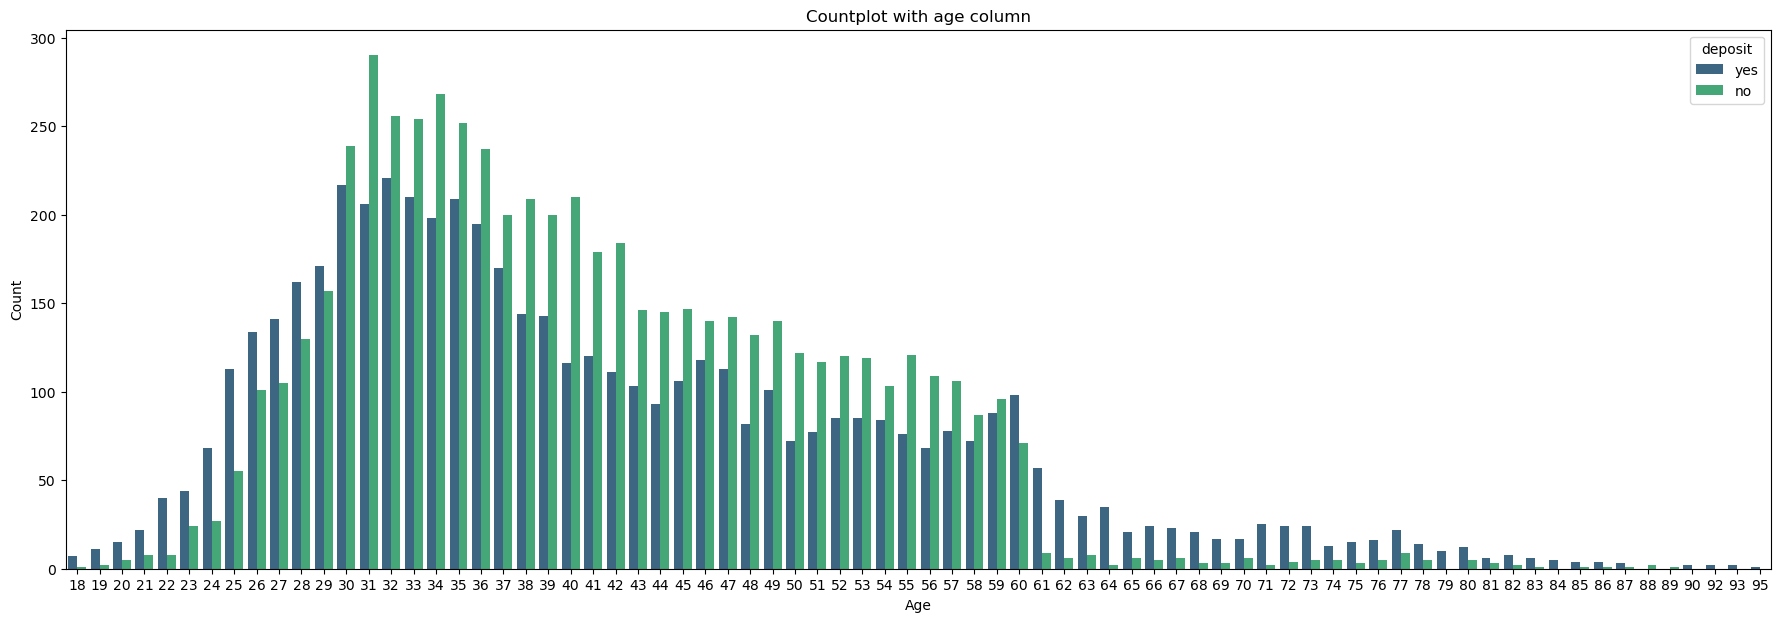

In [11]:
plt.figure(figsize=(22,7))
sns.countplot(data=df, hue='deposit', x='age', palette='viridis')
plt.title('Countplot with age column')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [12]:
df['job'].unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

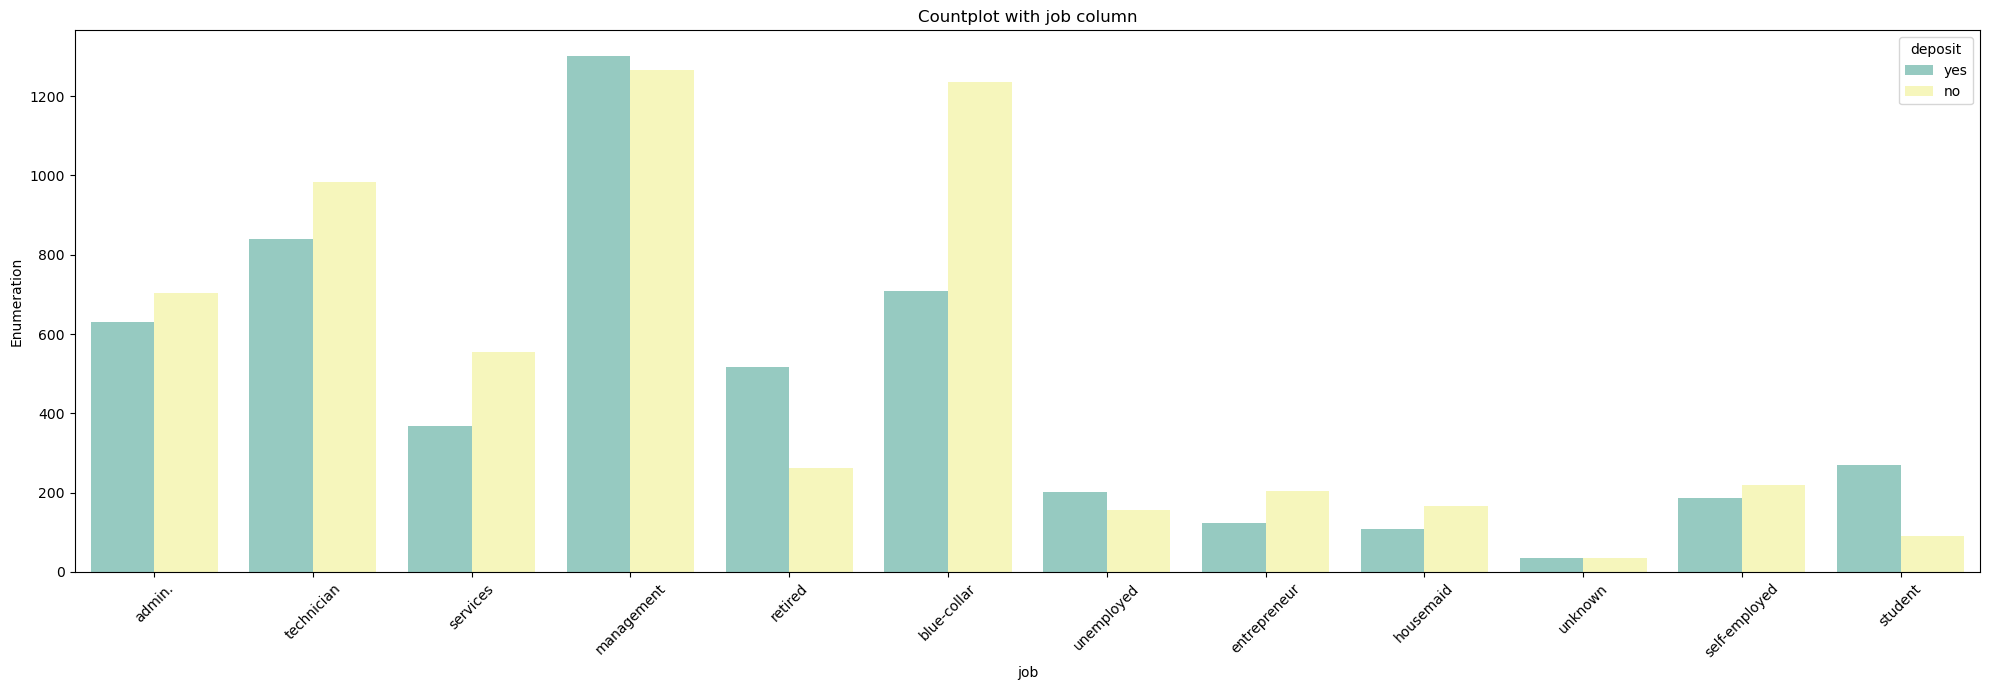

In [13]:
plt.figure(figsize=(20,7))
sns.countplot(data=df, hue='deposit', x='job', palette='Set3')
plt.title('Countplot with job column')
plt.xlabel('job')
plt.ylabel('Enumeration')
plt.xticks(rotation=45)
plt.tight_layout()

# Distribution of 'Job' And 'Age' column

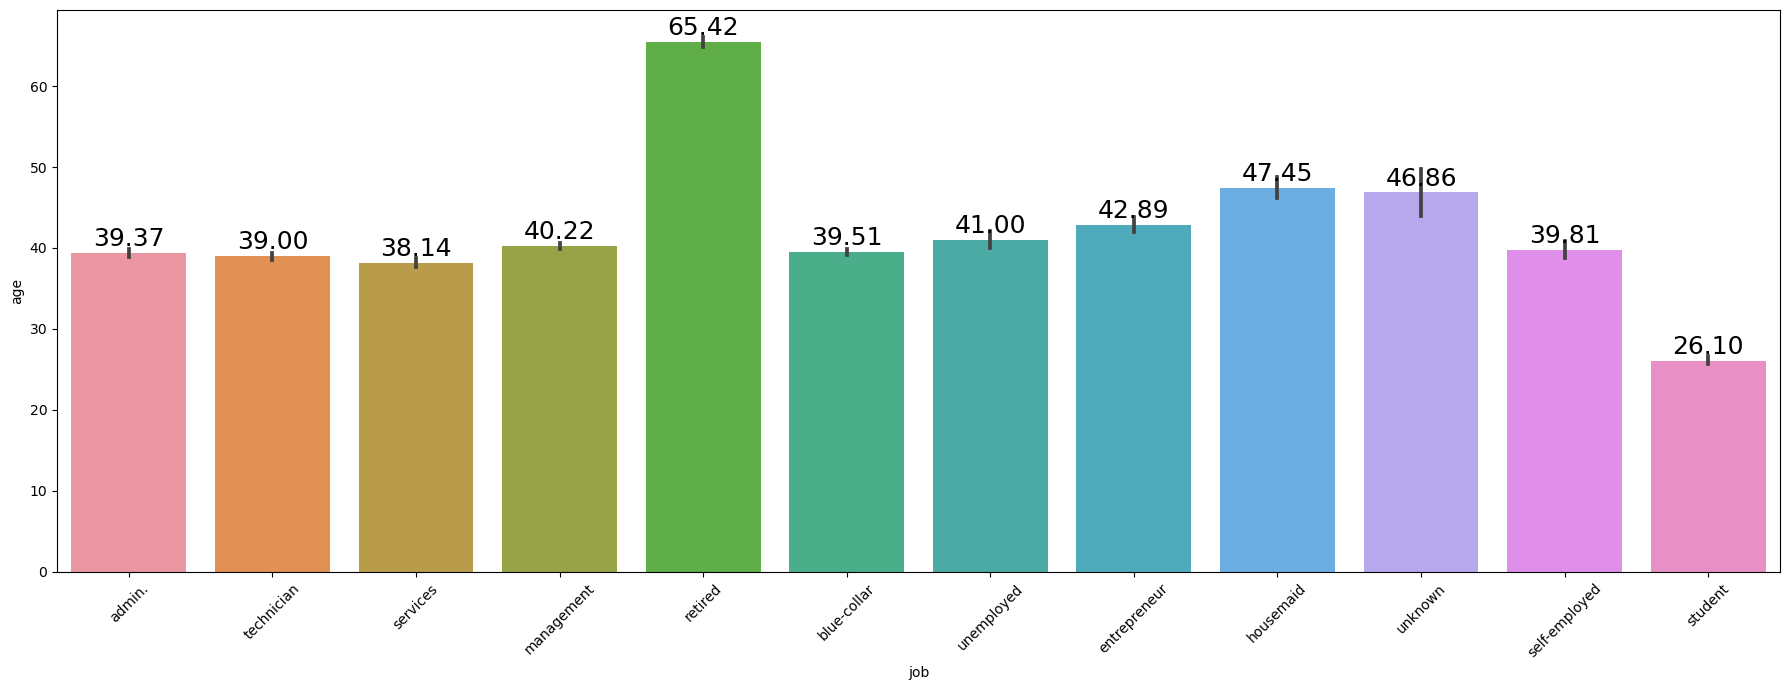

In [14]:
import plotly.express as px
plt.figure(figsize=(18,7))
ax = sns.barplot(data=df, x='job', y='age')
plt.xlabel('job')
plt.ylabel('age')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=18, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.xticks(rotation=45)
plt.tight_layout()

In [15]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

<Axes: ylabel='marital'>

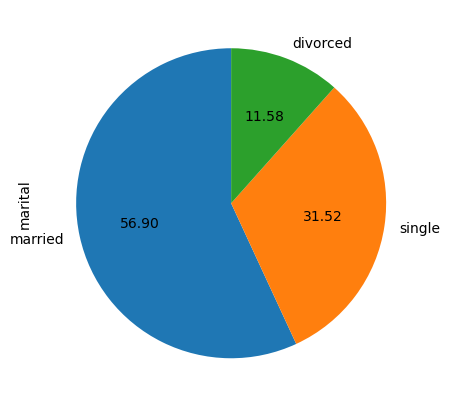

In [16]:
plt.figure(figsize=(5,16))
df['marital'].value_counts().plot(kind='pie', autopct='%.2f', startangle=90)

Text(0, 0.5, 'Count')

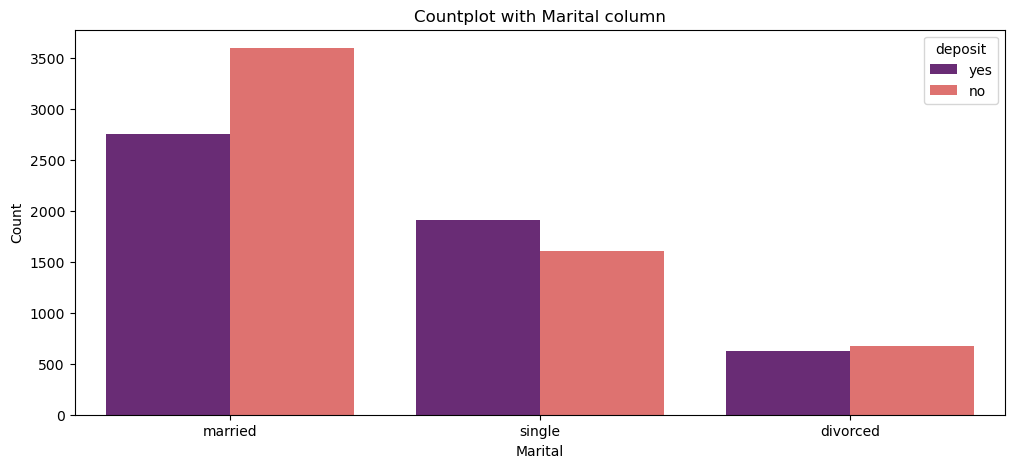

In [17]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='marital', hue='deposit', palette='magma')
plt.title('Countplot with Marital column')
plt.xlabel('Marital')
plt.ylabel('Count')


# Here the married customers are high in terms of subscribing term deposit 

In [18]:
df['age'].unique()

array([59, 56, 41, 55, 54, 42, 60, 37, 28, 38, 30, 29, 46, 31, 35, 32, 49,
       43, 26, 40, 33, 23, 48, 45, 36, 52, 53, 39, 57, 51, 44, 24, 50, 27,
       34, 47, 25, 58, 61, 68, 75, 22, 69, 66, 85, 72, 90, 67, 71, 21, 74,
       65, 62, 83, 70, 76, 77, 19, 73, 63, 20, 78, 95, 64, 79, 82, 18, 86,
       84, 87, 92, 81, 80, 93, 88, 89], dtype=int64)

In [19]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

# Distribution of 'Marital' And 'Age' Column

Text(0, 0.5, 'Age Count')

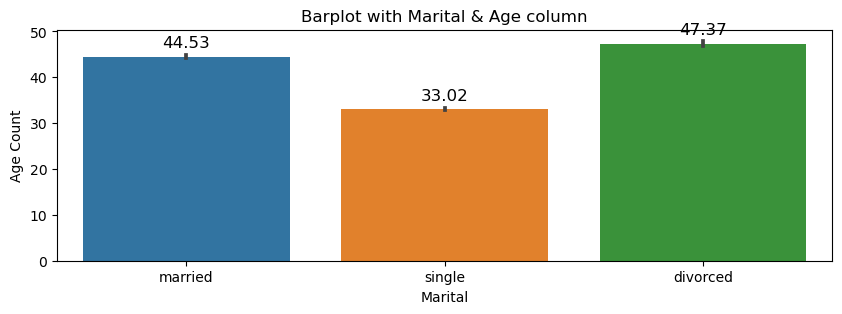

In [20]:
plt.figure(figsize=(10,3))
ax = sns.barplot(data=df, x='marital', y='age')
plt.title('Barplot with Marital & Age column')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')
plt.xlabel('Marital')
plt.ylabel('Age Count')

# Distribution of 'Marital' And 'Education' Column

<Axes: xlabel='marital', ylabel='count'>

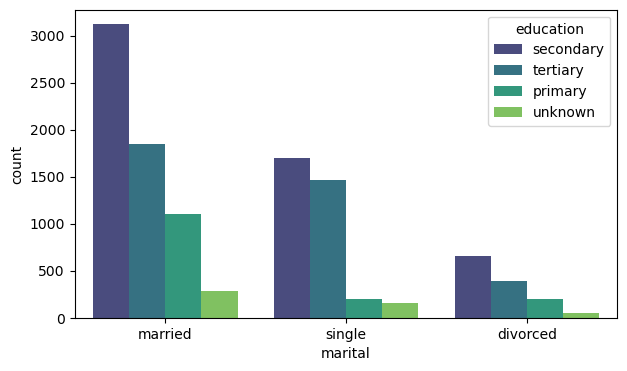

In [21]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='marital', hue='education', palette='viridis')

In [22]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

<Axes: xlabel='job', ylabel='Count'>

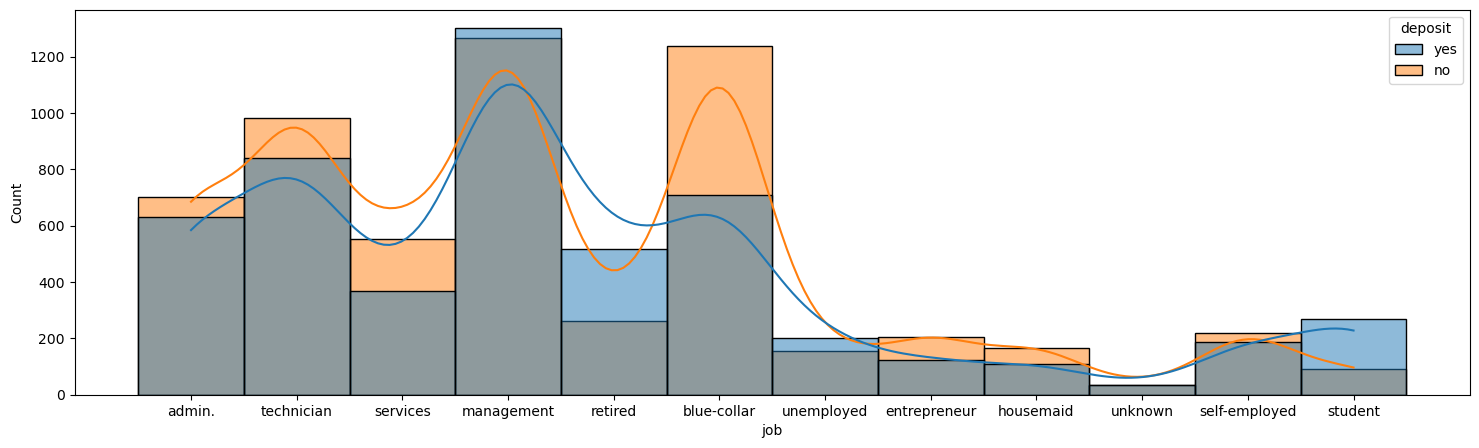

In [23]:
plt.figure(figsize=(18,5))
sns.histplot(data=df, x='job', hue='deposit', kde=True)

In [24]:
df['education'].unique()

array(['secondary', 'tertiary', 'primary', 'unknown'], dtype=object)

<Axes: ylabel='education'>

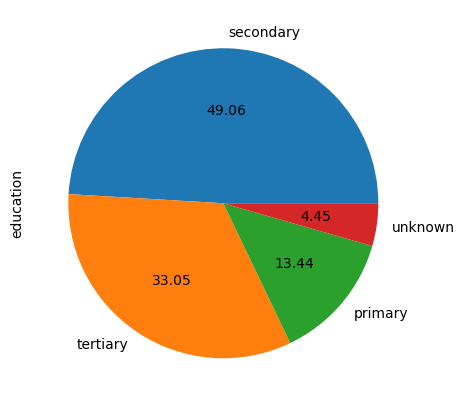

In [25]:
plt.figure(figsize=(5,16))
df['education'].value_counts().plot(kind='pie', autopct='%.2f')

Text(0, 0.5, 'Age enumeration')

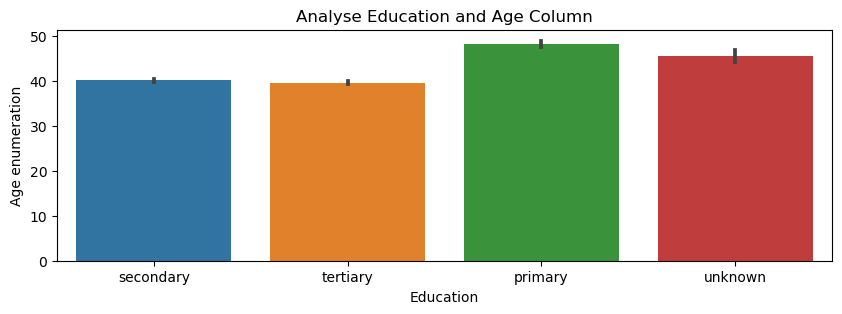

In [26]:
plt.figure(figsize=(10,3))
sns.barplot(data=df, x='education', y='age')
plt.title('Analyse Education and Age Column')
plt.xlabel('Education')
plt.ylabel('Age enumeration')

In [27]:
df['default'].unique()

array(['no', 'yes'], dtype=object)

<Axes: ylabel='default'>

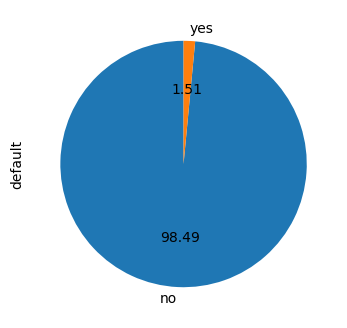

In [28]:
plt.figure(figsize=(7,4))
df['default'].value_counts().plot(kind='pie', autopct='%.2f', startangle=90)

# The default column states that whether the customer has credit in default or not
Almost 99% of the customer has credit in default

In [29]:
plt.figure(figsize=(5,3))
px.histogram(df, x='default', color='deposit', title="'default' & 'deposit'")

<Figure size 500x300 with 0 Axes>

In [30]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [31]:
df['balance'].unique()

array([2343,   45, 1270, ..., 1594, 2593, -134], dtype=int64)

C:\Users\DELL\AppData\Local\Temp\ipykernel_13924\3226368143.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




Text(0.5, 1.0, 'Distribution job with balance')

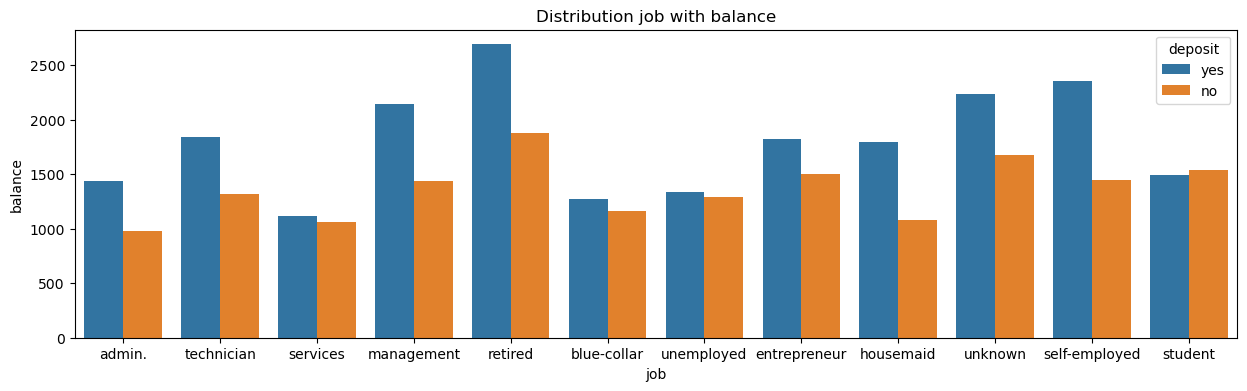

In [32]:
plt.figure(figsize=(15,4))
sns.barplot(data=df, x='job', y='balance', hue='deposit', ci=None)
plt.title('Distribution job with balance')

Text(0.5, 1.0, "'Balance' & 'Job'")

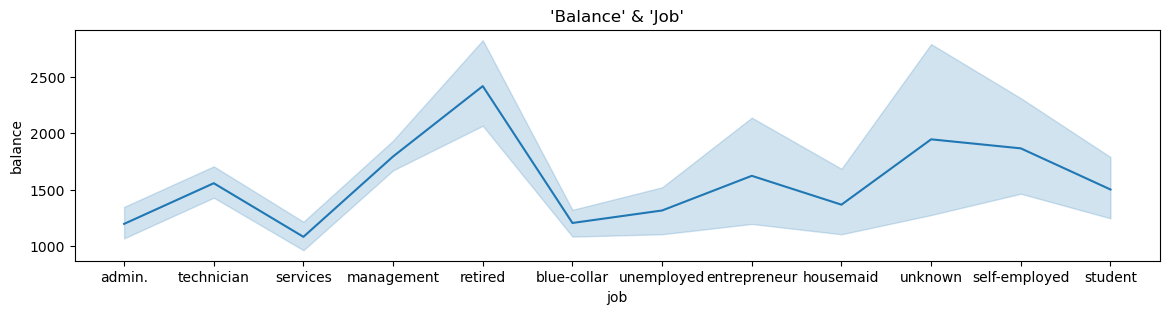

In [33]:
plt.figure(figsize = (14,3))
sns.lineplot(data = df, y = 'balance', x = 'job')
plt.title("'Balance' & 'Job'")

C:\Users\DELL\AppData\Local\Temp\ipykernel_13924\1468877060.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




Text(0, 0.5, 'Balance')

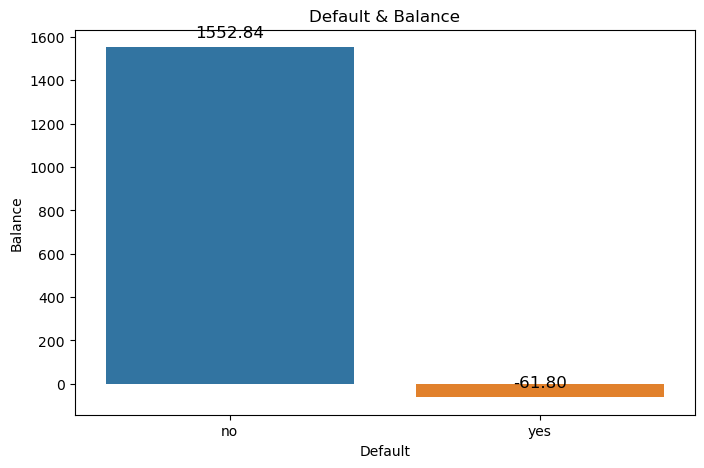

In [34]:
plt.figure(figsize=(8,5))
ax = sns.barplot(data=df, x='default', y='balance', ci=None)
plt.title('Default & Balance')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')
plt.xlabel('Default')
plt.ylabel('Balance')

In [35]:
df['housing'].unique()

array(['yes', 'no'], dtype=object)

<Axes: ylabel='housing'>

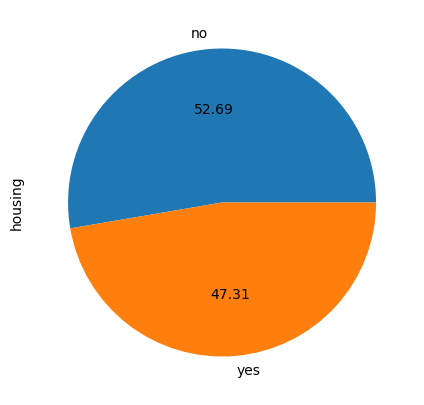

In [36]:
plt.figure(figsize=(8,5))
df['housing'].value_counts().plot(kind='pie', autopct='%.2f')

Text(0, 0.5, 'Balance')

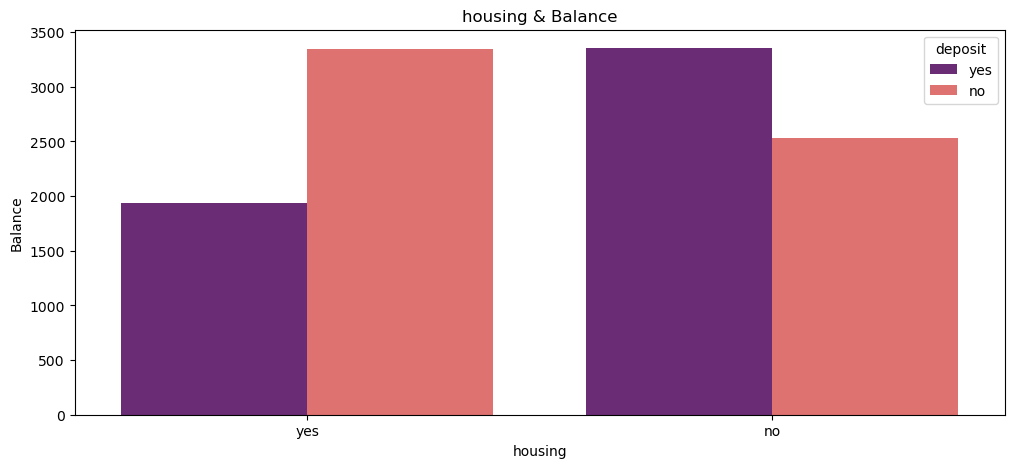

In [37]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='housing', hue='deposit', palette='magma')
plt.title('housing & Balance')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')
plt.xlabel('housing')
plt.ylabel('Balance')

In [38]:
df['loan'].unique()

array(['no', 'yes'], dtype=object)

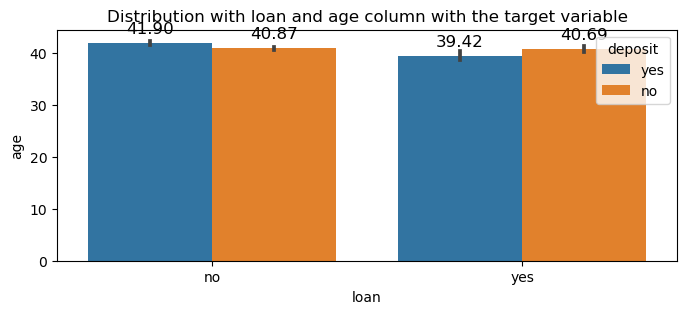

In [39]:
plt.figure(figsize=(8,3))
ax=sns.barplot(data=df, x='loan', y='age', hue='deposit')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')
    plt.title('Distribution with loan and age column with the target variable')

In [40]:

px.histogram(df, x='housing', color='loan', title="'housing' & 'loan'")

In [41]:
df['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

Text(0.5, 1.0, 'Contact distribution with deposit')

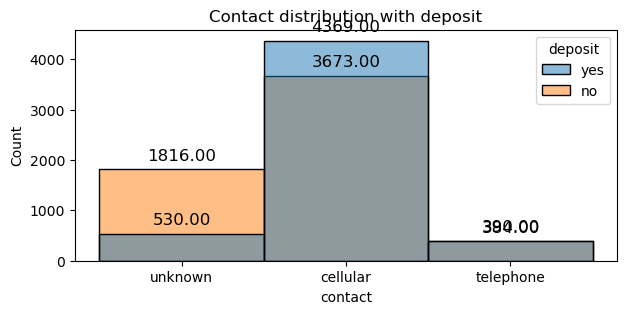

In [42]:
plt.figure(figsize=(7,3))
ax=sns.histplot(data=df, x='contact', hue='deposit')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')
plt.title('Contact distribution with deposit')

In [43]:
df['day'].unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24,  1, 10, 22, 25, 31],
      dtype=int64)

In [44]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

C:\Users\DELL\AppData\Local\Temp\ipykernel_13924\2075496516.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




Text(0.5, 1.0, "'Month' & 'Day'")

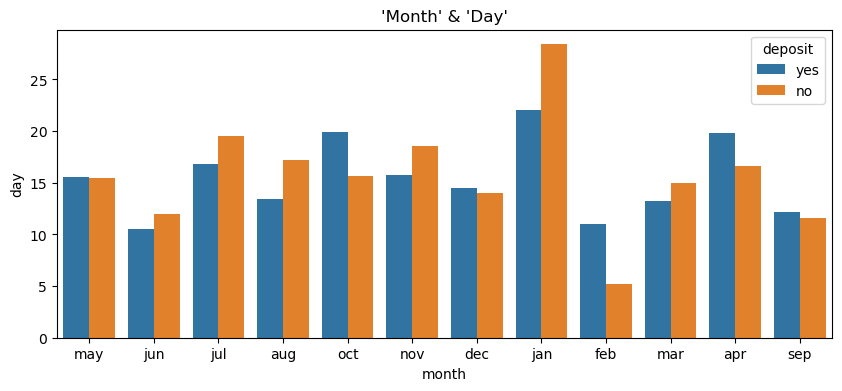

In [45]:
plt.figure(figsize=(10,4))
sns.barplot(data=df, x='month', y='day', hue='deposit', ci=None)
plt.title("'Month' & 'Day'")

In [46]:
df['duration'].unique()

array([1042, 1467, 1389, ..., 1504,  818, 1812], dtype=int64)

C:\Users\DELL\AppData\Local\Temp\ipykernel_13924\3824461434.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




Text(0.5, 1.0, 'Month and Duration')

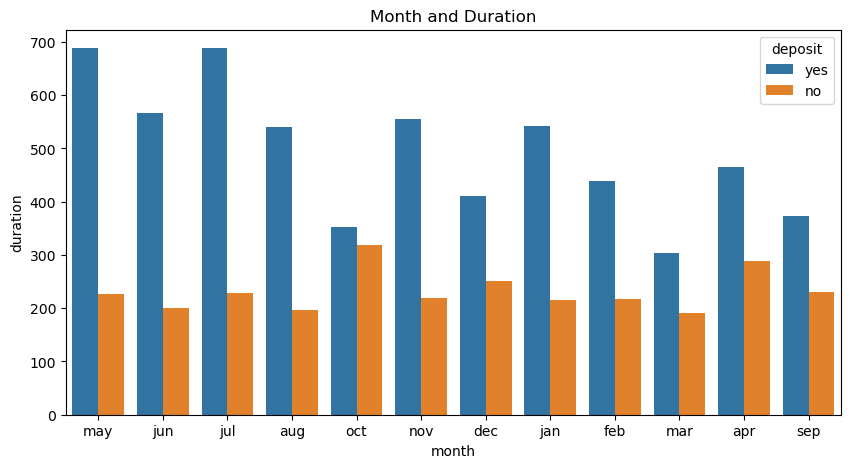

In [47]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='month', y='duration', hue='deposit', ci=None)
plt.title('Month and Duration')

In [48]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [49]:
df['campaign'].unique()

array([ 1,  2,  3,  4,  6,  5,  8, 11,  9, 10, 15, 12, 14,  7, 24, 13, 17,
       29, 21, 20, 16, 32, 19, 25, 22, 43, 18, 41, 63, 27, 30, 26, 23, 28,
       33, 31], dtype=int64)

In [50]:
df['previous'].unique()

array([ 0,  1,  4,  2,  3, 10,  7,  9,  5, 29,  6, 13, 17,  8, 11, 30, 22,
       58, 21, 14, 26, 12, 19, 55, 23, 15, 20, 27, 16, 41, 40, 28, 18, 37],
      dtype=int64)

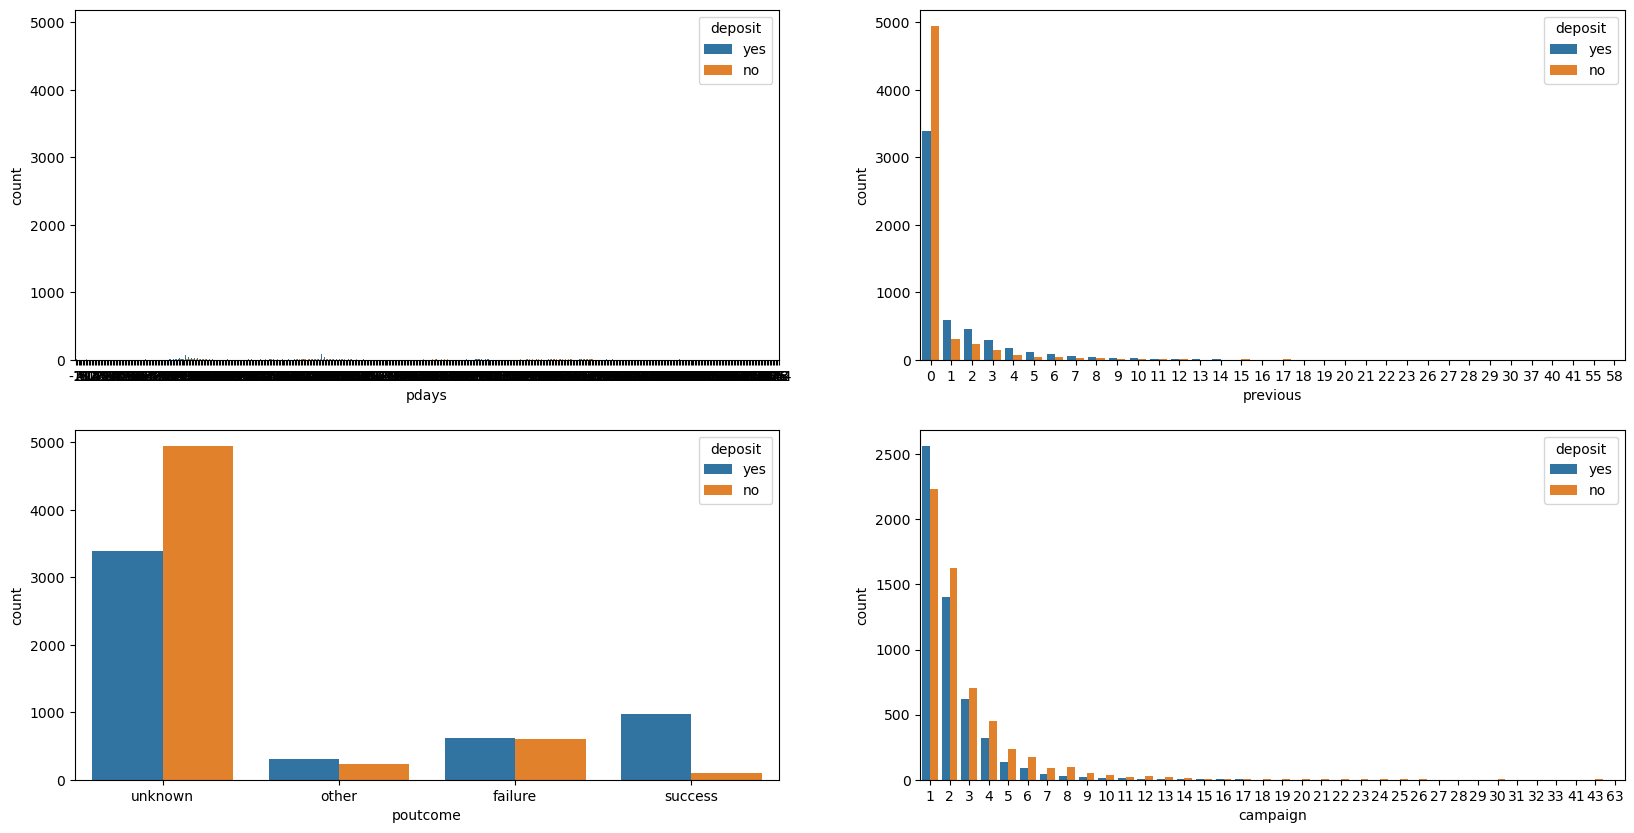

In [51]:
req_num = ['pdays', 'previous', 'poutcome', 'campaign']
plt.figure(figsize=(20,10))
for i in enumerate(req_num):
    plt.subplot(2,2,i[0]+1)
    sns.countplot(x=df[i[1]], hue=df['deposit'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_13924\2782819375.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




<Axes: xlabel='month', ylabel='pdays'>

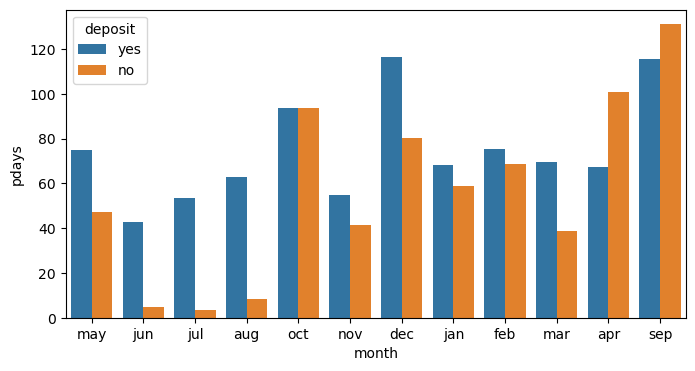

In [52]:
plt.figure(figsize=(8,4))
sns.barplot(data=df, x='month', y='pdays', hue='deposit', ci=None)

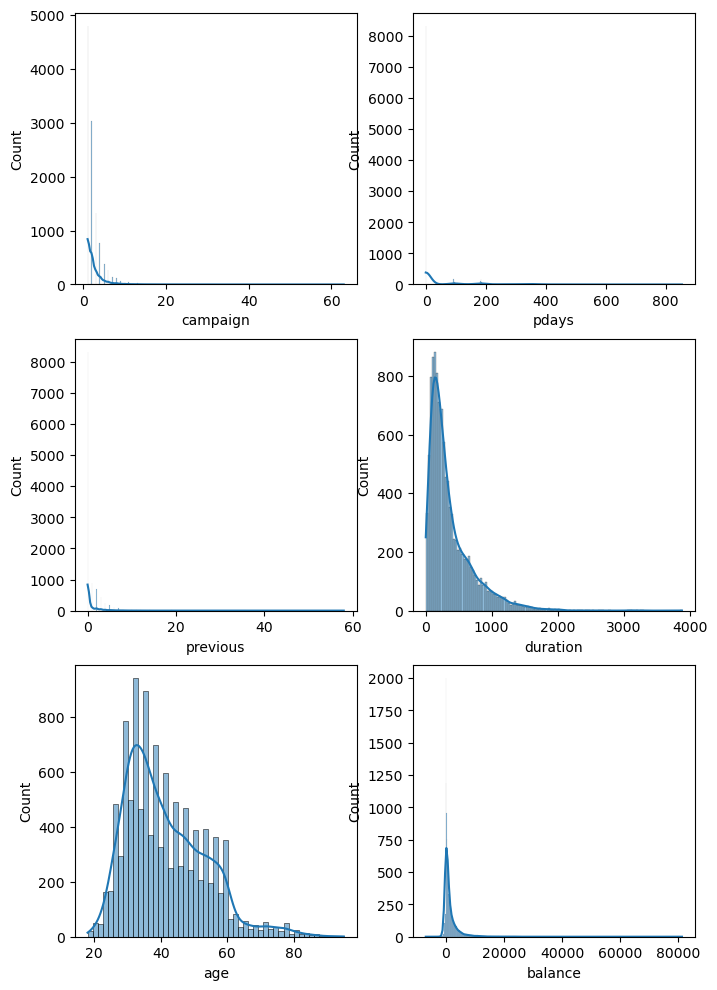

In [53]:
numeric=['campaign', 'pdays', 'previous', 'duration', 'age', 'balance']
plt.figure(figsize=(8,12))
for i in enumerate(numeric):
    plt.subplot(3,2,i[0]+1)
    sns.histplot(x=df[i[1]],kde=True)

In [54]:
value_counts = df['deposit'].value_counts()
proportions = value_counts / len(df)

print("\nProportions:")
print(proportions)


Proportions:
no     0.52616
yes    0.47384
Name: deposit, dtype: float64


<Axes: ylabel='deposit'>

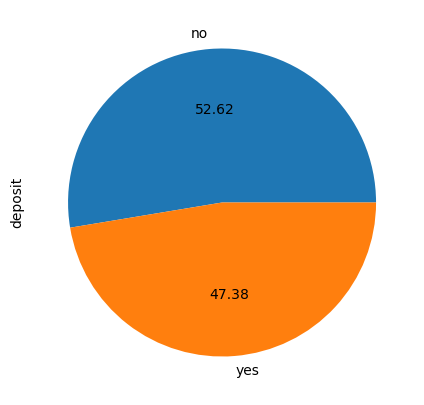

In [55]:
plt.figure(figsize=(5,5))
df['deposit'].value_counts().plot(kind='pie', autopct='%.2f')

Text(0.5, 1.0, "'Balance' & 'Marital Status'")

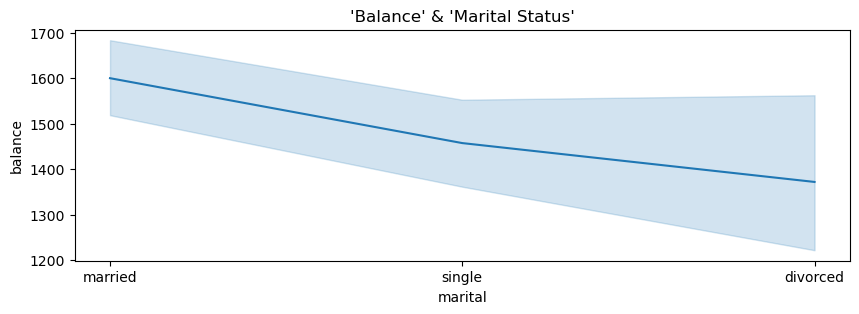

In [56]:
plt.figure(figsize = (10,3))
sns.lineplot(data = df, y = 'balance', x = 'marital')
plt.title("'Balance' & 'Marital Status'")

Text(0.5, 1.0, "'Balance' & 'Age'")

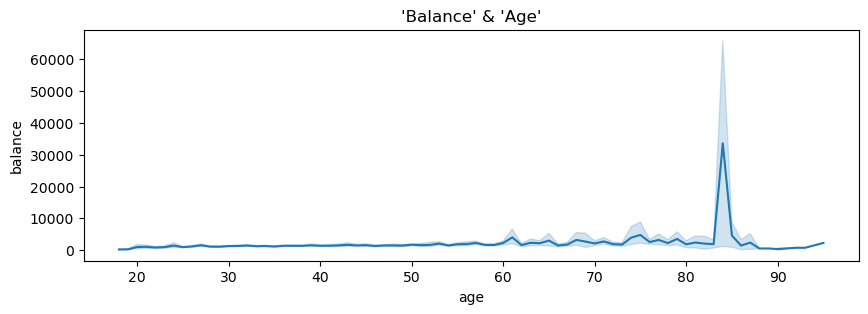

In [57]:
plt.figure(figsize = (10,3))
sns.lineplot(data = df, y = 'balance', x = 'age')
plt.title("'Balance' & 'Age'")

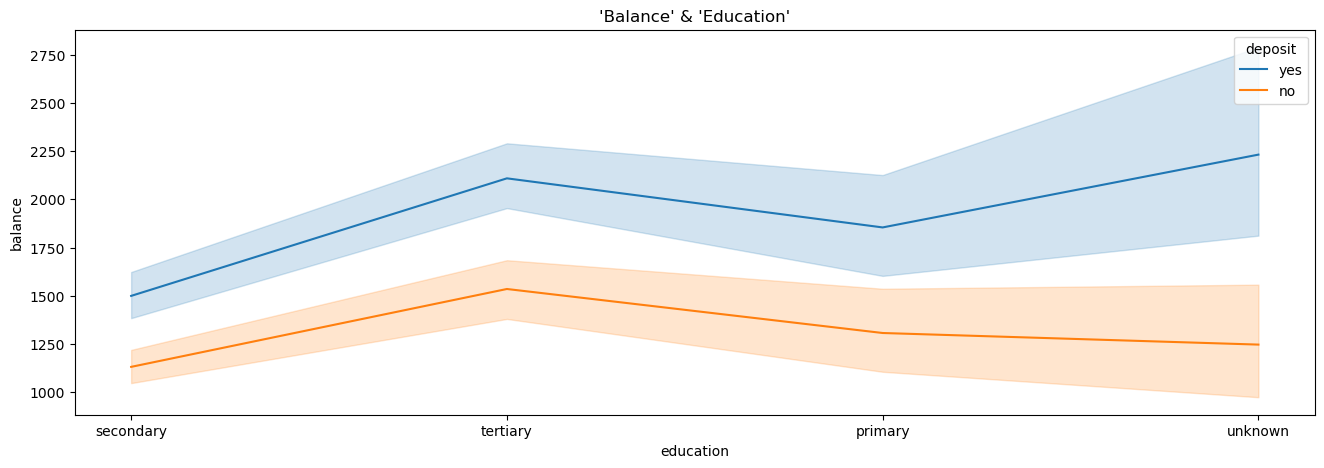

In [58]:
plt.figure(figsize = (16,5))
sns.lineplot(data = df, y = 'balance', x = 'education', hue = 'deposit')
plt.title("'Balance' & 'Education'");

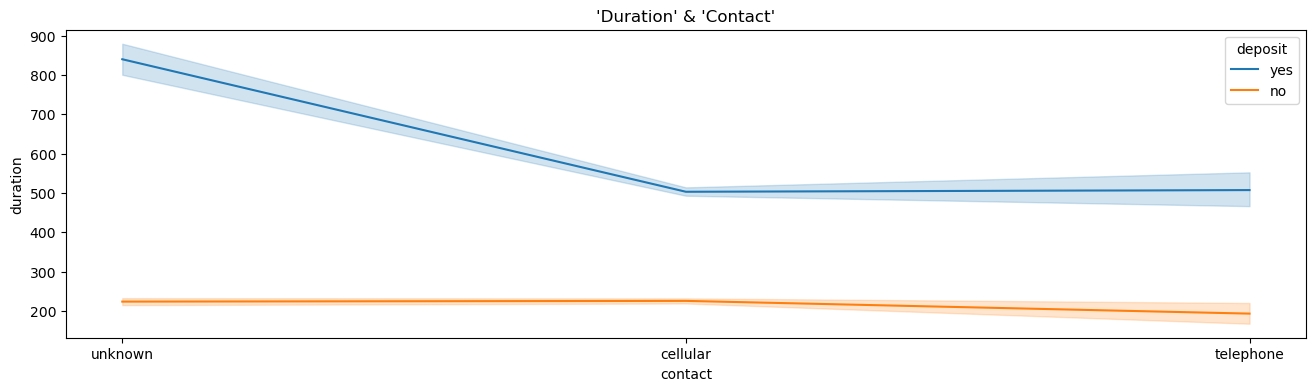

In [59]:
plt.figure(figsize = (16,4))
sns.lineplot(data = df, y = 'duration', x = 'contact', hue = 'deposit')
plt.title("'Duration' & 'Contact'");

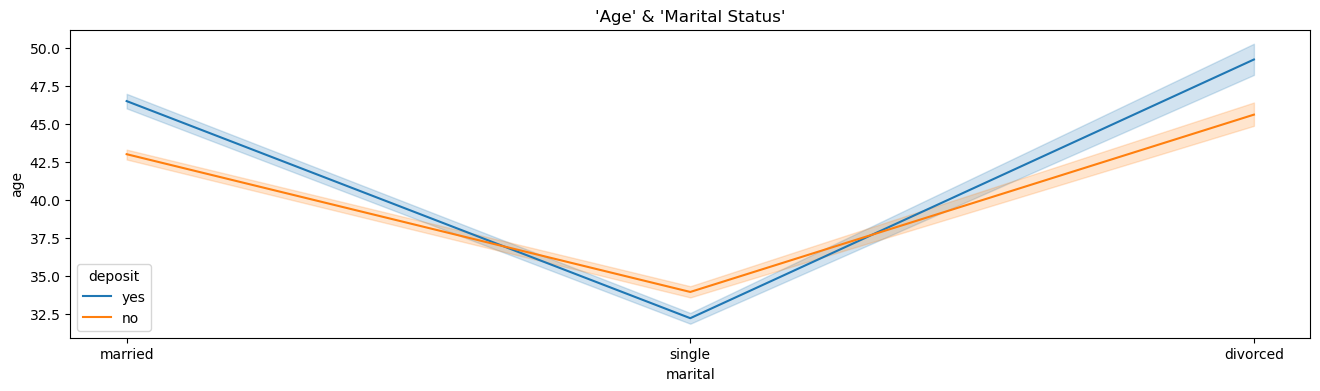

In [60]:
plt.figure(figsize = (16,4))
sns.lineplot(data = df, y = 'age', x = 'marital', hue = 'deposit')
plt.title("'Age' & 'Marital Status'");

<Axes: xlabel='default', ylabel='count'>

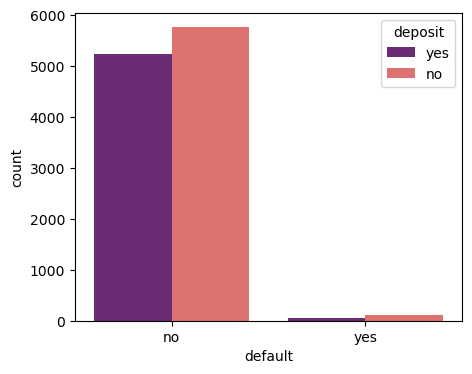

In [61]:
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='default', hue='deposit', palette='magma')

In [62]:
len(df)

11162

In [63]:
#df2.to_csv('Bank_deposit_transformed.csv', index=False)

# Replacing the categorical columns in numeric

In [64]:
df["default"] = df["default"].replace({'yes': 1, 'no': 0})
df["housing"] = df["housing"].replace({'yes': 1, 'no': 0})
df["loan"] = df["loan"].replace({'yes': 1, 'no': 0})
df["deposit"] = df["deposit"].replace({'yes': 1, 'no': 0})

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  int64 
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  int64 
 7   loan       11162 non-null  int64 
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  int64 
dtypes: int64(11), object(6)
memory usage: 1.4+ MB


# Heat Map Correlation

C:\Users\DELL\AppData\Local\Temp\ipykernel_13924\2755565236.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

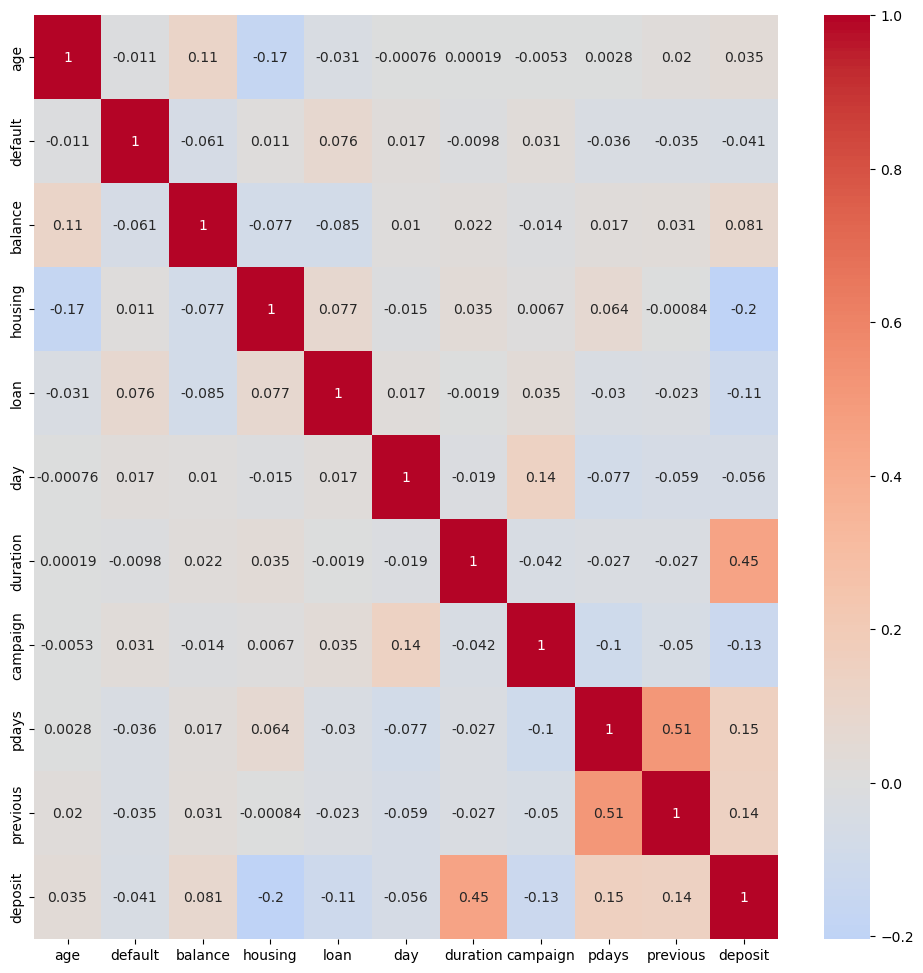

In [66]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)

# I tried One Hot Encode for this dataset

In [67]:
columns_to_encode = ['job', 'marital', 'education', 'contact', 'poutcome', 'month']

df2 = pd.get_dummies(df, columns=columns_to_encode, prefix=columns_to_encode)

In [68]:
df2 = df2.apply(lambda x: x.astype(int) if x.dtype == 'uint8' else x)

In [69]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  11162 non-null  int64
 1   default              11162 non-null  int64
 2   balance              11162 non-null  int64
 3   housing              11162 non-null  int64
 4   loan                 11162 non-null  int64
 5   day                  11162 non-null  int64
 6   duration             11162 non-null  int64
 7   campaign             11162 non-null  int64
 8   pdays                11162 non-null  int64
 9   previous             11162 non-null  int64
 10  deposit              11162 non-null  int64
 11  job_admin.           11162 non-null  int32
 12  job_blue-collar      11162 non-null  int32
 13  job_entrepreneur     11162 non-null  int32
 14  job_housemaid        11162 non-null  int32
 15  job_management       11162 non-null  int32
 16  job_retired          1

In [70]:
df2.head()

age  default  balance  housing  loan  day  duration  campaign  pdays  \
0   59        0     2343        1     0    5      1042         1     -1   
1   56        0       45        0     0    5      1467         1     -1   
2   41        0     1270        1     0    5      1389         1     -1   
3   55        0     2476        1     0    5       579         1     -1   
4   54        0      184        0     0    5       673         2     -1   

   previous  ...  month_dec  month_feb  month_jan  month_jul  month_jun  \
0         0  ...          0          0          0          0          0   
1         0  ...          0          0          0          0          0   
2         0  ...          0          0          0          0          0   
3         0  ...          0          0          0          0          0   
4         0  ...          0          0          0          0          0   

   month_mar  month_may  month_nov  month_oct  month_sep  
0          0          1          0          0          0  
1          0          1          0          0          0  
2          0          1          0          0          0  
3          0          1          0          0          0  
4          0          1          0          0          0  

[5 rows x 49 columns]

# Feature Scaling 
I used MinMaxScaling

In [71]:
df2.head()

age  default  balance  housing  loan  day  duration  campaign  pdays  \
0   59        0     2343        1     0    5      1042         1     -1   
1   56        0       45        0     0    5      1467         1     -1   
2   41        0     1270        1     0    5      1389         1     -1   
3   55        0     2476        1     0    5       579         1     -1   
4   54        0      184        0     0    5       673         2     -1   

   previous  ...  month_dec  month_feb  month_jan  month_jul  month_jun  \
0         0  ...          0          0          0          0          0   
1         0  ...          0          0          0          0          0   
2         0  ...          0          0          0          0          0   
3         0  ...          0          0          0          0          0   
4         0  ...          0          0          0          0          0   

   month_mar  month_may  month_nov  month_oct  month_sep  
0          0          1          0          0          0  
1          0          1          0          0          0  
2          0          1          0          0          0  
3          0          1          0          0          0  
4          0          1          0          0          0  

[5 rows x 49 columns]

In [72]:
from sklearn.preprocessing import MinMaxScaler

columns_to_scale = ['age', 'balance', 'duration']  
scaler = MinMaxScaler()

df2[columns_to_scale] = scaler.fit_transform(df2[columns_to_scale])

In [73]:
columns_with_negative_values = df2.columns[df2.apply(lambda col: any(col < 0))]
print("Columns with negative values:", list(columns_with_negative_values))

Columns with negative values: ['pdays']


In [74]:
#from sklearn.preprocessing import StandardScaler

#columns_to_scale = ['age', 'balance', 'duration', 'days']  
#scaler = StandardScaler()

#df_encoded[columns_to_scale] = scaler.fit_transform(df_encoded[columns_to_scale])

# Train Test Split

In [75]:
X = df2.drop(['deposit'], axis=1)
y = df2['deposit']

In [76]:
X.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'month_apr',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep'],
      dtype='object')

In [77]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: deposit, dtype: int64

In [78]:
from collections import Counter
counter = Counter(y)
print(counter)

Counter({0: 5873, 1: 5289})


In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# Logistic Regression

In [80]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train,y_train)
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)

In [81]:
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing accuracy: ", test_accuracy)
print(classification_report(y_test, y_test_pred))

Training Accuracy: 0.8234964721693359
Testing accuracy:  0.825347066726377
              precision    recall  f1-score   support

           0       0.82      0.85      0.84      1175
           1       0.83      0.80      0.81      1058

    accuracy                           0.83      2233
   macro avg       0.83      0.82      0.82      2233
weighted avg       0.83      0.83      0.83      2233



# KNN Classifier

In [82]:
knn_classifier = KNeighborsClassifier(n_neighbors=5, weights='uniform', p=2)

knn_classifier.fit(X_train, y_train)

y_train_pred = knn_classifier.predict(X_train)
y_test_pred = knn_classifier.predict(X_test)

In [83]:
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", test_accuracy)

print(classification_report(y_test, y_test_pred))

Training Accuracy: 0.7963937730988913
Testing Accuracy: 0.6918943125839677
              precision    recall  f1-score   support

           0       0.68      0.78      0.73      1175
           1       0.71      0.59      0.65      1058

    accuracy                           0.69      2233
   macro avg       0.69      0.69      0.69      2233
weighted avg       0.69      0.69      0.69      2233



# Hyperparameter Tuning 

# DecisionTreeClassifier

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

dt_classifier = DecisionTreeClassifier()

param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [85]:
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_dt_model = grid_search.best_estimator_
y_pred = best_dt_model.predict(X_test)

In [86]:
print("Best Hyperparameters:", grid_search.best_params_)
train_accuracy = best_dt_model.score(X_train, y_train)
print("Training Set Accuracy:", train_accuracy)

test_accuracy = best_dt_model.score(X_test, y_test)
print("Testing Set Accuracy:", test_accuracy)

print(classification_report(y_test, y_test_pred))

Best Hyperparameters: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training Set Accuracy: 0.8339119722253332
Testing Set Accuracy: 0.8163905060456784
              precision    recall  f1-score   support

           0       0.52      0.60      0.56      1181
           1       0.46      0.39      0.42      1052

    accuracy                           0.50      2233
   macro avg       0.49      0.49      0.49      2233
weighted avg       0.49      0.50      0.49      2233



# RandomForestClassifier

In [87]:
rf_classifier = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [88]:
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [89]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [90]:
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", grid_search.best_params_)

train_accuracy = best_model.score(X_train, y_train)
print("Training Set Accuracy:", train_accuracy)

test_accuracy = best_model.score(X_test, y_test)
print("Testing Set Accuracy:", test_accuracy)

print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy}')

Best Hyperparameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Training Set Accuracy: 0.9448986448650465
Testing Set Accuracy: 0.8660994178235557
              precision    recall  f1-score   support

           0       0.91      0.82      0.87      1181
           1       0.82      0.91      0.87      1052

    accuracy                           0.87      2233
   macro avg       0.87      0.87      0.87      2233
weighted avg       0.87      0.87      0.87      2233

Accuracy: 0.8660994178235557


In [91]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)
#tp fp
#fn tn

array([[973, 208],
       [ 91, 961]], dtype=int64)

# XGBoost (Extreme Gradient Boosting) GridSearchCV parameter
Using possible Hyperparameters

In [92]:
xgb_classifier = XGBClassifier(objective='binary:logistic', random_state=42)

param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 400],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
}

In [93]:
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

In [94]:
print("Best Hyperparameters:", grid_search.best_params_)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

train_accuracy = best_model.score(X_train, y_train)
print("Training Set Accuracy:", train_accuracy)

test_accuracy = best_model.score(X_test, y_test)
print("Testing Set Accuracy:", test_accuracy)

print(classification_report(y_test, y_pred))

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 400}
Accuracy: 0.8719211822660099
Training Set Accuracy: 0.9126441930787322
Testing Set Accuracy: 0.8719211822660099
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      1181
           1       0.85      0.89      0.87      1052

    accuracy                           0.87      2233
   macro avg       0.87      0.87      0.87      2233
weighted avg       0.87      0.87      0.87      2233



In [95]:
confusion_matrix(y_test, y_pred)
#tp fp
#fn tn

array([[1012,  169],
       [ 117,  935]], dtype=int64)

# Feature Importances

In [96]:
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [97]:
print(model.feature_importances_)

[0.04223087 0.00190886 0.04167816 0.02648324 0.01205217 0.06765193
 0.33039857 0.03201588 0.01451161 0.01008796 0.01027976 0.00936916
 0.00405937 0.00304605 0.01058917 0.00563811 0.00448774 0.00677537
 0.00603781 0.01037365 0.00468144 0.00164943 0.00653655 0.01053138
 0.00975117 0.00695183 0.00999017 0.0106189  0.00559033 0.00484555
 0.00433252 0.04377106 0.0043457  0.00433504 0.08281359 0.01530628
 0.0095905  0.01637258 0.0019427  0.01144839 0.00850873 0.01608629
 0.01014618 0.01198979 0.00960107 0.01178954 0.01131743 0.00548042]


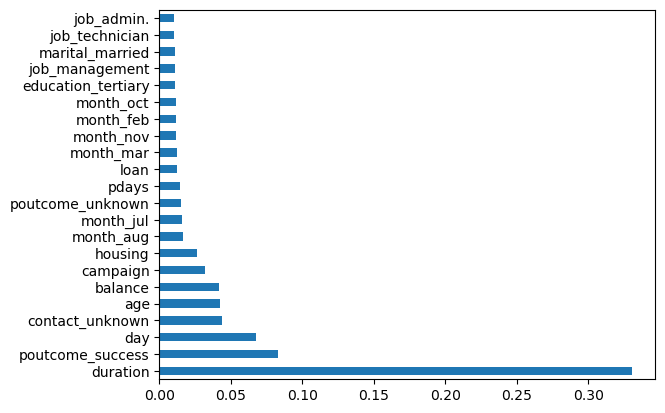

In [98]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(22).plot(kind='barh')
plt.show()

# Checking whether our data is overfitted or not

Cross-Validation Scores: [0.85946249 0.86730123 0.85386338 0.85946249 0.86218487]
Mean CV Score: 0.8604548919231746


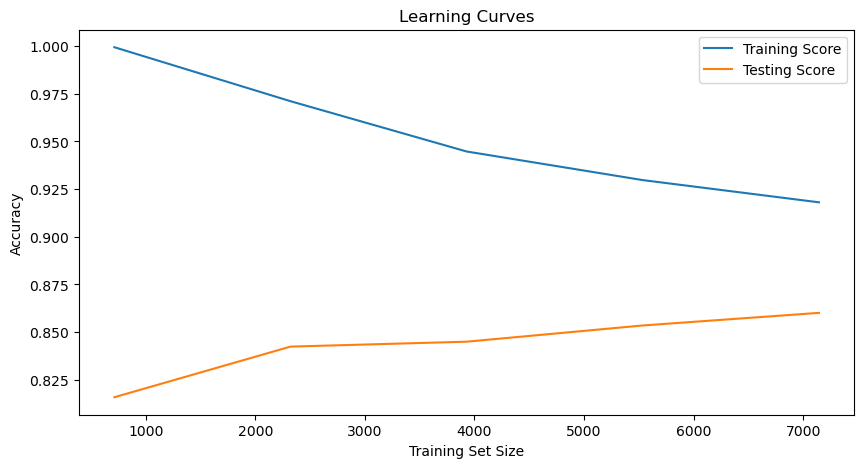

In [99]:
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

train_sizes, train_scores, test_scores = learning_curve(best_model, X_train, y_train, cv=5)

plt.figure(figsize=(10, 5))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Testing Score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.show()


# Gaussian Naive Bayes 

In [100]:
nb_model = GaussianNB()

nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

train_accuracy = best_model.score(X_train, y_train)
print("Training Set Accuracy:", train_accuracy)

test_accuracy = best_model.score(X_test, y_test)
print("Testing Set Accuracy:", test_accuracy)

print(classification_report(y_test, y_pred))

Accuracy: 0.7223466188983431
Training Set Accuracy: 0.9126441930787322
Testing Set Accuracy: 0.8719211822660099
              precision    recall  f1-score   support

           0       0.69      0.87      0.77      1181
           1       0.79      0.56      0.65      1052

    accuracy                           0.72      2233
   macro avg       0.74      0.71      0.71      2233
weighted avg       0.74      0.72      0.71      2233



# Gradient Boosting Classifier

In [101]:
gb_model = GradientBoostingClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],            # Number of boosting stages to be run
    'learning_rate': [0.01, 0.1, 0.2],        # Step size shrinkage used in updating the weights
    'max_depth': [3, 4, 5],                   # Maximum depth of the individual trees
}

grid_search = GridSearchCV(gb_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Accuracy: 0.8728168383340797


# Cat Boost Classifier

In [102]:
catboost_model = CatBoostClassifier()

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [3, 4, 5],
    'iterations': [50, 100, 200],
}

grid_search_catboost = GridSearchCV(catboost_model, param_grid, cv=5, scoring='accuracy')
grid_search_catboost.fit(X_train, y_train)


best_params_catboost = grid_search_catboost.best_params_
print("Best Hyperparameters (CatBoost):", best_params_catboost)

best_model_catboost = grid_search_catboost.best_estimator_
y_pred_catboost = best_model_catboost.predict(X_test)

accuracy_catboost = accuracy_score(y_test, y_pred_catboost)
print("Accuracy (CatBoost):", accuracy_catboost)

train_accuracy = best_model_catboost.score(X_train, y_train)
print("Training Set Accuracy:", train_accuracy)

test_accuracy = best_model_catboost.score(X_test, y_test)
print("Testing Set Accuracy:", test_accuracy)

print(classification_report(y_test, y_pred))

0:	learn: 0.6889254	total: 184ms	remaining: 9s
1:	learn: 0.6847447	total: 195ms	remaining: 4.68s
2:	learn: 0.6804582	total: 203ms	remaining: 3.18s
3:	learn: 0.6768661	total: 210ms	remaining: 2.41s
4:	learn: 0.6730177	total: 218ms	remaining: 1.96s
5:	learn: 0.6700094	total: 225ms	remaining: 1.65s
6:	learn: 0.6662894	total: 233ms	remaining: 1.43s
7:	learn: 0.6625120	total: 241ms	remaining: 1.26s
8:	learn: 0.6592990	total: 249ms	remaining: 1.14s
9:	learn: 0.6557490	total: 257ms	remaining: 1.03s
10:	learn: 0.6521794	total: 264ms	remaining: 936ms
11:	learn: 0.6492176	total: 272ms	remaining: 861ms
12:	learn: 0.6458523	total: 279ms	remaining: 794ms
13:	learn: 0.6422977	total: 287ms	remaining: 738ms
14:	learn: 0.6394136	total: 295ms	remaining: 689ms
15:	learn: 0.6361861	total: 303ms	remaining: 644ms
16:	learn: 0.6333078	total: 310ms	remaining: 602ms
17:	learn: 0.6299742	total: 318ms	remaining: 565ms
18:	learn: 0.6270049	total: 326ms	remaining: 531ms
19:	learn: 0.6241001	total: 334ms	remaining:

28:	learn: 0.6006999	total: 239ms	remaining: 173ms
29:	learn: 0.5984888	total: 247ms	remaining: 165ms
30:	learn: 0.5960863	total: 256ms	remaining: 157ms
31:	learn: 0.5937431	total: 264ms	remaining: 148ms
32:	learn: 0.5913227	total: 271ms	remaining: 140ms
33:	learn: 0.5893677	total: 279ms	remaining: 132ms
34:	learn: 0.5871896	total: 288ms	remaining: 123ms
35:	learn: 0.5846880	total: 296ms	remaining: 115ms
36:	learn: 0.5829094	total: 304ms	remaining: 107ms
37:	learn: 0.5806877	total: 312ms	remaining: 98.4ms
38:	learn: 0.5785409	total: 320ms	remaining: 90.3ms
39:	learn: 0.5761212	total: 328ms	remaining: 82ms
40:	learn: 0.5742073	total: 335ms	remaining: 73.6ms
41:	learn: 0.5722916	total: 342ms	remaining: 65.2ms
42:	learn: 0.5703508	total: 350ms	remaining: 56.9ms
43:	learn: 0.5684063	total: 358ms	remaining: 48.8ms
44:	learn: 0.5665278	total: 365ms	remaining: 40.6ms
45:	learn: 0.5647637	total: 374ms	remaining: 32.5ms
46:	learn: 0.5631964	total: 381ms	remaining: 24.3ms
47:	learn: 0.5617214	to

2:	learn: 0.5948902	total: 23.2ms	remaining: 363ms
3:	learn: 0.5727521	total: 31.4ms	remaining: 362ms
4:	learn: 0.5523405	total: 38.4ms	remaining: 345ms
5:	learn: 0.5371445	total: 44.6ms	remaining: 327ms
6:	learn: 0.5245677	total: 51.1ms	remaining: 314ms
7:	learn: 0.5112209	total: 58.3ms	remaining: 306ms
8:	learn: 0.5012694	total: 64.8ms	remaining: 295ms
9:	learn: 0.4929074	total: 72ms	remaining: 288ms
10:	learn: 0.4852424	total: 79.6ms	remaining: 282ms
11:	learn: 0.4791959	total: 87.5ms	remaining: 277ms
12:	learn: 0.4728807	total: 94ms	remaining: 267ms
13:	learn: 0.4679434	total: 101ms	remaining: 259ms
14:	learn: 0.4645610	total: 109ms	remaining: 254ms
15:	learn: 0.4601468	total: 116ms	remaining: 248ms
16:	learn: 0.4563432	total: 123ms	remaining: 240ms
17:	learn: 0.4520933	total: 131ms	remaining: 232ms
18:	learn: 0.4501718	total: 137ms	remaining: 224ms
19:	learn: 0.4472101	total: 144ms	remaining: 217ms
20:	learn: 0.4444205	total: 152ms	remaining: 211ms
21:	learn: 0.4415348	total: 161m

31:	learn: 0.3812879	total: 254ms	remaining: 143ms
32:	learn: 0.3797040	total: 262ms	remaining: 135ms
33:	learn: 0.3769532	total: 270ms	remaining: 127ms
34:	learn: 0.3757205	total: 278ms	remaining: 119ms
35:	learn: 0.3742568	total: 285ms	remaining: 111ms
36:	learn: 0.3734483	total: 293ms	remaining: 103ms
37:	learn: 0.3716095	total: 301ms	remaining: 95ms
38:	learn: 0.3697087	total: 308ms	remaining: 87ms
39:	learn: 0.3660473	total: 316ms	remaining: 79.1ms
40:	learn: 0.3644565	total: 324ms	remaining: 71.1ms
41:	learn: 0.3636245	total: 332ms	remaining: 63.2ms
42:	learn: 0.3626694	total: 339ms	remaining: 55.3ms
43:	learn: 0.3606985	total: 347ms	remaining: 47.3ms
44:	learn: 0.3584780	total: 355ms	remaining: 39.4ms
45:	learn: 0.3581704	total: 362ms	remaining: 31.5ms
46:	learn: 0.3568206	total: 369ms	remaining: 23.6ms
47:	learn: 0.3563522	total: 377ms	remaining: 15.7ms
48:	learn: 0.3555828	total: 384ms	remaining: 7.83ms
49:	learn: 0.3548769	total: 391ms	remaining: 0us
0:	learn: 0.6327028	total

10:	learn: 0.4380146	total: 84.3ms	remaining: 299ms
11:	learn: 0.4340993	total: 93.7ms	remaining: 297ms
12:	learn: 0.4296120	total: 102ms	remaining: 291ms
13:	learn: 0.4266695	total: 110ms	remaining: 283ms
14:	learn: 0.4228112	total: 117ms	remaining: 273ms
15:	learn: 0.4190793	total: 123ms	remaining: 262ms
16:	learn: 0.4165174	total: 131ms	remaining: 255ms
17:	learn: 0.4140657	total: 139ms	remaining: 247ms
18:	learn: 0.4115091	total: 147ms	remaining: 239ms
19:	learn: 0.4081561	total: 154ms	remaining: 231ms
20:	learn: 0.4051770	total: 161ms	remaining: 223ms
21:	learn: 0.4025150	total: 169ms	remaining: 215ms
22:	learn: 0.4004217	total: 176ms	remaining: 206ms
23:	learn: 0.3977542	total: 183ms	remaining: 198ms
24:	learn: 0.3963322	total: 191ms	remaining: 191ms
25:	learn: 0.3945445	total: 198ms	remaining: 183ms
26:	learn: 0.3923152	total: 206ms	remaining: 176ms
27:	learn: 0.3908946	total: 213ms	remaining: 168ms
28:	learn: 0.3895585	total: 221ms	remaining: 160ms
29:	learn: 0.3880235	total: 2

26:	learn: 0.6059974	total: 209ms	remaining: 566ms
27:	learn: 0.6034550	total: 217ms	remaining: 558ms
28:	learn: 0.6007540	total: 225ms	remaining: 550ms
29:	learn: 0.5987036	total: 232ms	remaining: 540ms
30:	learn: 0.5962014	total: 238ms	remaining: 530ms
31:	learn: 0.5940817	total: 246ms	remaining: 523ms
32:	learn: 0.5915910	total: 254ms	remaining: 516ms
33:	learn: 0.5894071	total: 261ms	remaining: 506ms
34:	learn: 0.5872587	total: 268ms	remaining: 497ms
35:	learn: 0.5851834	total: 275ms	remaining: 489ms
36:	learn: 0.5830558	total: 282ms	remaining: 480ms
37:	learn: 0.5810478	total: 289ms	remaining: 471ms
38:	learn: 0.5792249	total: 297ms	remaining: 465ms
39:	learn: 0.5774682	total: 304ms	remaining: 456ms
40:	learn: 0.5751791	total: 312ms	remaining: 448ms
41:	learn: 0.5729477	total: 318ms	remaining: 439ms
42:	learn: 0.5708385	total: 325ms	remaining: 431ms
43:	learn: 0.5689377	total: 333ms	remaining: 424ms
44:	learn: 0.5671524	total: 340ms	remaining: 416ms
45:	learn: 0.5652106	total: 347

0:	learn: 0.6892176	total: 6.6ms	remaining: 654ms
1:	learn: 0.6852723	total: 14.9ms	remaining: 730ms
2:	learn: 0.6814940	total: 22.2ms	remaining: 717ms
3:	learn: 0.6776003	total: 29.6ms	remaining: 711ms
4:	learn: 0.6738163	total: 37.4ms	remaining: 711ms
5:	learn: 0.6697442	total: 44.9ms	remaining: 704ms
6:	learn: 0.6660552	total: 52.6ms	remaining: 698ms
7:	learn: 0.6621133	total: 60.4ms	remaining: 694ms
8:	learn: 0.6583249	total: 68.4ms	remaining: 692ms
9:	learn: 0.6546497	total: 76ms	remaining: 684ms
10:	learn: 0.6512634	total: 84.3ms	remaining: 682ms
11:	learn: 0.6483724	total: 91.8ms	remaining: 673ms
12:	learn: 0.6449263	total: 98.8ms	remaining: 661ms
13:	learn: 0.6416246	total: 107ms	remaining: 654ms
14:	learn: 0.6381800	total: 115ms	remaining: 650ms
15:	learn: 0.6354948	total: 123ms	remaining: 644ms
16:	learn: 0.6324529	total: 129ms	remaining: 631ms
17:	learn: 0.6296462	total: 136ms	remaining: 617ms
18:	learn: 0.6267219	total: 143ms	remaining: 610ms
19:	learn: 0.6236384	total: 151

72:	learn: 0.5238758	total: 596ms	remaining: 220ms
73:	learn: 0.5227671	total: 605ms	remaining: 212ms
74:	learn: 0.5214355	total: 613ms	remaining: 204ms
75:	learn: 0.5205425	total: 621ms	remaining: 196ms
76:	learn: 0.5193995	total: 630ms	remaining: 188ms
77:	learn: 0.5182695	total: 637ms	remaining: 180ms
78:	learn: 0.5171845	total: 646ms	remaining: 172ms
79:	learn: 0.5161952	total: 654ms	remaining: 163ms
80:	learn: 0.5149670	total: 661ms	remaining: 155ms
81:	learn: 0.5139210	total: 670ms	remaining: 147ms
82:	learn: 0.5127413	total: 677ms	remaining: 139ms
83:	learn: 0.5117459	total: 686ms	remaining: 131ms
84:	learn: 0.5107142	total: 693ms	remaining: 122ms
85:	learn: 0.5097647	total: 702ms	remaining: 114ms
86:	learn: 0.5088253	total: 710ms	remaining: 106ms
87:	learn: 0.5078855	total: 717ms	remaining: 97.8ms
88:	learn: 0.5070060	total: 725ms	remaining: 89.6ms
89:	learn: 0.5061078	total: 733ms	remaining: 81.5ms
90:	learn: 0.5051069	total: 740ms	remaining: 73.2ms
91:	learn: 0.5042072	total:

51:	learn: 0.3973752	total: 405ms	remaining: 374ms
52:	learn: 0.3963607	total: 412ms	remaining: 366ms
53:	learn: 0.3949095	total: 421ms	remaining: 358ms
54:	learn: 0.3945115	total: 427ms	remaining: 350ms
55:	learn: 0.3938340	total: 435ms	remaining: 342ms
56:	learn: 0.3930856	total: 443ms	remaining: 334ms
57:	learn: 0.3927762	total: 451ms	remaining: 327ms
58:	learn: 0.3921050	total: 459ms	remaining: 319ms
59:	learn: 0.3914113	total: 467ms	remaining: 311ms
60:	learn: 0.3908813	total: 475ms	remaining: 303ms
61:	learn: 0.3892920	total: 483ms	remaining: 296ms
62:	learn: 0.3887481	total: 491ms	remaining: 288ms
63:	learn: 0.3877465	total: 499ms	remaining: 280ms
64:	learn: 0.3872335	total: 506ms	remaining: 273ms
65:	learn: 0.3868248	total: 513ms	remaining: 264ms
66:	learn: 0.3849930	total: 521ms	remaining: 257ms
67:	learn: 0.3844983	total: 529ms	remaining: 249ms
68:	learn: 0.3835591	total: 536ms	remaining: 241ms
69:	learn: 0.3817826	total: 544ms	remaining: 233ms
70:	learn: 0.3808427	total: 552

13:	learn: 0.4678216	total: 109ms	remaining: 671ms
14:	learn: 0.4632002	total: 118ms	remaining: 669ms
15:	learn: 0.4592547	total: 126ms	remaining: 663ms
16:	learn: 0.4544240	total: 134ms	remaining: 653ms
17:	learn: 0.4506409	total: 141ms	remaining: 643ms
18:	learn: 0.4475846	total: 149ms	remaining: 637ms
19:	learn: 0.4451000	total: 158ms	remaining: 631ms
20:	learn: 0.4419926	total: 165ms	remaining: 622ms
21:	learn: 0.4389458	total: 174ms	remaining: 616ms
22:	learn: 0.4363207	total: 182ms	remaining: 610ms
23:	learn: 0.4336070	total: 191ms	remaining: 603ms
24:	learn: 0.4308622	total: 199ms	remaining: 596ms
25:	learn: 0.4289104	total: 206ms	remaining: 586ms
26:	learn: 0.4265617	total: 214ms	remaining: 579ms
27:	learn: 0.4248248	total: 223ms	remaining: 572ms
28:	learn: 0.4223499	total: 231ms	remaining: 565ms
29:	learn: 0.4207437	total: 239ms	remaining: 558ms
30:	learn: 0.4192579	total: 247ms	remaining: 551ms
31:	learn: 0.4176801	total: 256ms	remaining: 544ms
32:	learn: 0.4160637	total: 264

79:	learn: 0.3686680	total: 622ms	remaining: 155ms
80:	learn: 0.3681223	total: 629ms	remaining: 148ms
81:	learn: 0.3676669	total: 637ms	remaining: 140ms
82:	learn: 0.3670080	total: 645ms	remaining: 132ms
83:	learn: 0.3662531	total: 652ms	remaining: 124ms
84:	learn: 0.3654918	total: 661ms	remaining: 117ms
85:	learn: 0.3642841	total: 669ms	remaining: 109ms
86:	learn: 0.3629877	total: 676ms	remaining: 101ms
87:	learn: 0.3626678	total: 683ms	remaining: 93.2ms
88:	learn: 0.3623070	total: 692ms	remaining: 85.5ms
89:	learn: 0.3618433	total: 700ms	remaining: 77.8ms
90:	learn: 0.3613703	total: 708ms	remaining: 70ms
91:	learn: 0.3609824	total: 716ms	remaining: 62.2ms
92:	learn: 0.3601630	total: 722ms	remaining: 54.4ms
93:	learn: 0.3592864	total: 730ms	remaining: 46.6ms
94:	learn: 0.3586237	total: 737ms	remaining: 38.8ms
95:	learn: 0.3581409	total: 745ms	remaining: 31ms
96:	learn: 0.3572607	total: 752ms	remaining: 23.3ms
97:	learn: 0.3564459	total: 760ms	remaining: 15.5ms
98:	learn: 0.3556570	tot

40:	learn: 0.3704363	total: 330ms	remaining: 475ms
41:	learn: 0.3673577	total: 339ms	remaining: 468ms
42:	learn: 0.3657151	total: 346ms	remaining: 458ms
43:	learn: 0.3647897	total: 353ms	remaining: 450ms
44:	learn: 0.3633758	total: 362ms	remaining: 442ms
45:	learn: 0.3620916	total: 370ms	remaining: 434ms
46:	learn: 0.3607429	total: 378ms	remaining: 426ms
47:	learn: 0.3599429	total: 386ms	remaining: 418ms
48:	learn: 0.3585515	total: 394ms	remaining: 410ms
49:	learn: 0.3578858	total: 402ms	remaining: 402ms
50:	learn: 0.3568576	total: 410ms	remaining: 394ms
51:	learn: 0.3549503	total: 419ms	remaining: 387ms
52:	learn: 0.3531097	total: 427ms	remaining: 379ms
53:	learn: 0.3522002	total: 436ms	remaining: 371ms
54:	learn: 0.3513956	total: 444ms	remaining: 364ms
55:	learn: 0.3497394	total: 453ms	remaining: 356ms
56:	learn: 0.3486962	total: 461ms	remaining: 348ms
57:	learn: 0.3478979	total: 469ms	remaining: 340ms
58:	learn: 0.3472346	total: 478ms	remaining: 332ms
59:	learn: 0.3463955	total: 486

1:	learn: 0.5763493	total: 15ms	remaining: 733ms
2:	learn: 0.5359796	total: 22.2ms	remaining: 717ms
3:	learn: 0.5088008	total: 30.3ms	remaining: 727ms
4:	learn: 0.4865048	total: 37.5ms	remaining: 712ms
5:	learn: 0.4741641	total: 44.7ms	remaining: 701ms
6:	learn: 0.4642369	total: 51.3ms	remaining: 681ms
7:	learn: 0.4550689	total: 58.7ms	remaining: 675ms
8:	learn: 0.4467866	total: 66.6ms	remaining: 673ms
9:	learn: 0.4412580	total: 74.5ms	remaining: 670ms
10:	learn: 0.4357116	total: 82.6ms	remaining: 668ms
11:	learn: 0.4313003	total: 90.8ms	remaining: 666ms
12:	learn: 0.4278689	total: 99ms	remaining: 663ms
13:	learn: 0.4244643	total: 107ms	remaining: 657ms
14:	learn: 0.4214759	total: 115ms	remaining: 653ms
15:	learn: 0.4178422	total: 123ms	remaining: 647ms
16:	learn: 0.4153338	total: 130ms	remaining: 634ms
17:	learn: 0.4127923	total: 137ms	remaining: 625ms
18:	learn: 0.4093265	total: 143ms	remaining: 612ms
19:	learn: 0.4078986	total: 150ms	remaining: 602ms
20:	learn: 0.4062898	total: 159m

76:	learn: 0.3360778	total: 607ms	remaining: 181ms
77:	learn: 0.3356784	total: 617ms	remaining: 174ms
78:	learn: 0.3351708	total: 625ms	remaining: 166ms
79:	learn: 0.3346513	total: 633ms	remaining: 158ms
80:	learn: 0.3343415	total: 641ms	remaining: 150ms
81:	learn: 0.3336744	total: 649ms	remaining: 142ms
82:	learn: 0.3329204	total: 657ms	remaining: 134ms
83:	learn: 0.3325087	total: 664ms	remaining: 127ms
84:	learn: 0.3318807	total: 673ms	remaining: 119ms
85:	learn: 0.3313476	total: 681ms	remaining: 111ms
86:	learn: 0.3308902	total: 689ms	remaining: 103ms
87:	learn: 0.3304601	total: 698ms	remaining: 95.2ms
88:	learn: 0.3297753	total: 706ms	remaining: 87.3ms
89:	learn: 0.3290934	total: 715ms	remaining: 79.4ms
90:	learn: 0.3286203	total: 723ms	remaining: 71.5ms
91:	learn: 0.3282393	total: 731ms	remaining: 63.6ms
92:	learn: 0.3278441	total: 740ms	remaining: 55.7ms
93:	learn: 0.3273421	total: 748ms	remaining: 47.7ms
94:	learn: 0.3260961	total: 756ms	remaining: 39.8ms
95:	learn: 0.3256492	to

157:	learn: 0.4610221	total: 1.18s	remaining: 314ms
158:	learn: 0.4605889	total: 1.19s	remaining: 307ms
159:	learn: 0.4601703	total: 1.2s	remaining: 299ms
160:	learn: 0.4596186	total: 1.21s	remaining: 292ms
161:	learn: 0.4591812	total: 1.21s	remaining: 285ms
162:	learn: 0.4587307	total: 1.22s	remaining: 277ms
163:	learn: 0.4583206	total: 1.23s	remaining: 270ms
164:	learn: 0.4579499	total: 1.24s	remaining: 262ms
165:	learn: 0.4575891	total: 1.24s	remaining: 255ms
166:	learn: 0.4571638	total: 1.25s	remaining: 247ms
167:	learn: 0.4568378	total: 1.26s	remaining: 240ms
168:	learn: 0.4564698	total: 1.27s	remaining: 233ms
169:	learn: 0.4560367	total: 1.27s	remaining: 225ms
170:	learn: 0.4555970	total: 1.28s	remaining: 218ms
171:	learn: 0.4551488	total: 1.29s	remaining: 210ms
172:	learn: 0.4546501	total: 1.3s	remaining: 203ms
173:	learn: 0.4542552	total: 1.3s	remaining: 195ms
174:	learn: 0.4539281	total: 1.31s	remaining: 188ms
175:	learn: 0.4535857	total: 1.32s	remaining: 180ms
176:	learn: 0.4

129:	learn: 0.4796794	total: 997ms	remaining: 537ms
130:	learn: 0.4790906	total: 1s	remaining: 530ms
131:	learn: 0.4784132	total: 1.01s	remaining: 521ms
132:	learn: 0.4778512	total: 1.02s	remaining: 514ms
133:	learn: 0.4772045	total: 1.03s	remaining: 506ms
134:	learn: 0.4767327	total: 1.03s	remaining: 498ms
135:	learn: 0.4760905	total: 1.04s	remaining: 490ms
136:	learn: 0.4755226	total: 1.05s	remaining: 482ms
137:	learn: 0.4749584	total: 1.06s	remaining: 475ms
138:	learn: 0.4744179	total: 1.06s	remaining: 467ms
139:	learn: 0.4739447	total: 1.07s	remaining: 460ms
140:	learn: 0.4734389	total: 1.08s	remaining: 452ms
141:	learn: 0.4731118	total: 1.09s	remaining: 445ms
142:	learn: 0.4726446	total: 1.1s	remaining: 437ms
143:	learn: 0.4721252	total: 1.1s	remaining: 430ms
144:	learn: 0.4715039	total: 1.11s	remaining: 422ms
145:	learn: 0.4710341	total: 1.12s	remaining: 414ms
146:	learn: 0.4705871	total: 1.13s	remaining: 406ms
147:	learn: 0.4700142	total: 1.13s	remaining: 398ms
148:	learn: 0.469

100:	learn: 0.4975784	total: 787ms	remaining: 771ms
101:	learn: 0.4966797	total: 795ms	remaining: 764ms
102:	learn: 0.4957576	total: 802ms	remaining: 755ms
103:	learn: 0.4950789	total: 810ms	remaining: 748ms
104:	learn: 0.4943437	total: 818ms	remaining: 740ms
105:	learn: 0.4935454	total: 826ms	remaining: 732ms
106:	learn: 0.4927717	total: 832ms	remaining: 723ms
107:	learn: 0.4920945	total: 840ms	remaining: 716ms
108:	learn: 0.4913545	total: 847ms	remaining: 707ms
109:	learn: 0.4906109	total: 855ms	remaining: 700ms
110:	learn: 0.4900181	total: 863ms	remaining: 692ms
111:	learn: 0.4893353	total: 871ms	remaining: 685ms
112:	learn: 0.4885263	total: 878ms	remaining: 676ms
113:	learn: 0.4878628	total: 885ms	remaining: 668ms
114:	learn: 0.4871311	total: 893ms	remaining: 660ms
115:	learn: 0.4864801	total: 900ms	remaining: 652ms
116:	learn: 0.4857748	total: 908ms	remaining: 644ms
117:	learn: 0.4851970	total: 915ms	remaining: 636ms
118:	learn: 0.4846182	total: 922ms	remaining: 628ms
119:	learn: 

80:	learn: 0.5153393	total: 624ms	remaining: 917ms
81:	learn: 0.5140492	total: 632ms	remaining: 909ms
82:	learn: 0.5130435	total: 640ms	remaining: 902ms
83:	learn: 0.5121177	total: 648ms	remaining: 895ms
84:	learn: 0.5111307	total: 655ms	remaining: 886ms
85:	learn: 0.5102170	total: 662ms	remaining: 878ms
86:	learn: 0.5092649	total: 671ms	remaining: 871ms
87:	learn: 0.5084809	total: 679ms	remaining: 864ms
88:	learn: 0.5073319	total: 686ms	remaining: 856ms
89:	learn: 0.5062906	total: 693ms	remaining: 847ms
90:	learn: 0.5052110	total: 700ms	remaining: 838ms
91:	learn: 0.5043789	total: 707ms	remaining: 830ms
92:	learn: 0.5034332	total: 715ms	remaining: 823ms
93:	learn: 0.5024679	total: 722ms	remaining: 814ms
94:	learn: 0.5014542	total: 729ms	remaining: 806ms
95:	learn: 0.5006323	total: 737ms	remaining: 798ms
96:	learn: 0.4997008	total: 745ms	remaining: 791ms
97:	learn: 0.4987168	total: 752ms	remaining: 783ms
98:	learn: 0.4978750	total: 760ms	remaining: 776ms
99:	learn: 0.4969686	total: 768

53:	learn: 0.5489490	total: 416ms	remaining: 1.13s
54:	learn: 0.5475788	total: 425ms	remaining: 1.12s
55:	learn: 0.5464158	total: 432ms	remaining: 1.11s
56:	learn: 0.5450483	total: 440ms	remaining: 1.1s
57:	learn: 0.5436703	total: 448ms	remaining: 1.1s
58:	learn: 0.5421172	total: 456ms	remaining: 1.09s
59:	learn: 0.5407482	total: 464ms	remaining: 1.08s
60:	learn: 0.5394360	total: 472ms	remaining: 1.07s
61:	learn: 0.5381159	total: 479ms	remaining: 1.07s
62:	learn: 0.5367234	total: 487ms	remaining: 1.06s
63:	learn: 0.5350812	total: 494ms	remaining: 1.05s
64:	learn: 0.5336912	total: 501ms	remaining: 1.04s
65:	learn: 0.5323731	total: 508ms	remaining: 1.03s
66:	learn: 0.5308753	total: 515ms	remaining: 1.02s
67:	learn: 0.5296431	total: 523ms	remaining: 1.01s
68:	learn: 0.5284273	total: 531ms	remaining: 1.01s
69:	learn: 0.5270211	total: 538ms	remaining: 999ms
70:	learn: 0.5259550	total: 546ms	remaining: 992ms
71:	learn: 0.5248970	total: 554ms	remaining: 984ms
72:	learn: 0.5238758	total: 561ms

26:	learn: 0.4258517	total: 205ms	remaining: 1.31s
27:	learn: 0.4242324	total: 214ms	remaining: 1.31s
28:	learn: 0.4215101	total: 222ms	remaining: 1.31s
29:	learn: 0.4199802	total: 230ms	remaining: 1.3s
30:	learn: 0.4172270	total: 238ms	remaining: 1.29s
31:	learn: 0.4150570	total: 246ms	remaining: 1.29s
32:	learn: 0.4140512	total: 254ms	remaining: 1.28s
33:	learn: 0.4122991	total: 262ms	remaining: 1.28s
34:	learn: 0.4112918	total: 270ms	remaining: 1.27s
35:	learn: 0.4103046	total: 277ms	remaining: 1.26s
36:	learn: 0.4092136	total: 284ms	remaining: 1.25s
37:	learn: 0.4075370	total: 292ms	remaining: 1.24s
38:	learn: 0.4059700	total: 299ms	remaining: 1.23s
39:	learn: 0.4036613	total: 306ms	remaining: 1.23s
40:	learn: 0.4026704	total: 314ms	remaining: 1.22s
41:	learn: 0.4012358	total: 322ms	remaining: 1.21s
42:	learn: 0.4002108	total: 329ms	remaining: 1.2s
43:	learn: 0.3992641	total: 337ms	remaining: 1.19s
44:	learn: 0.3981712	total: 344ms	remaining: 1.18s
45:	learn: 0.3972356	total: 352ms

1:	learn: 0.6284163	total: 15.5ms	remaining: 1.53s
2:	learn: 0.6009875	total: 24.2ms	remaining: 1.59s
3:	learn: 0.5834311	total: 32.4ms	remaining: 1.59s
4:	learn: 0.5671788	total: 39.5ms	remaining: 1.54s
5:	learn: 0.5477289	total: 46.4ms	remaining: 1.5s
6:	learn: 0.5313239	total: 53.5ms	remaining: 1.48s
7:	learn: 0.5196262	total: 61.4ms	remaining: 1.47s
8:	learn: 0.5095676	total: 68.7ms	remaining: 1.46s
9:	learn: 0.5007798	total: 76.3ms	remaining: 1.45s
10:	learn: 0.4927367	total: 83.1ms	remaining: 1.43s
11:	learn: 0.4844084	total: 89.9ms	remaining: 1.41s
12:	learn: 0.4773353	total: 97.9ms	remaining: 1.41s
13:	learn: 0.4726205	total: 105ms	remaining: 1.39s
14:	learn: 0.4678729	total: 112ms	remaining: 1.38s
15:	learn: 0.4636095	total: 120ms	remaining: 1.38s
16:	learn: 0.4602829	total: 128ms	remaining: 1.38s
17:	learn: 0.4562820	total: 136ms	remaining: 1.38s
18:	learn: 0.4529565	total: 144ms	remaining: 1.37s
19:	learn: 0.4494132	total: 151ms	remaining: 1.36s
20:	learn: 0.4461070	total: 1

182:	learn: 0.3252905	total: 1.43s	remaining: 132ms
183:	learn: 0.3245389	total: 1.43s	remaining: 125ms
184:	learn: 0.3245154	total: 1.44s	remaining: 117ms
185:	learn: 0.3243358	total: 1.45s	remaining: 109ms
186:	learn: 0.3240153	total: 1.46s	remaining: 101ms
187:	learn: 0.3237181	total: 1.46s	remaining: 93.4ms
188:	learn: 0.3234364	total: 1.47s	remaining: 85.6ms
189:	learn: 0.3231356	total: 1.48s	remaining: 77.9ms
190:	learn: 0.3231091	total: 1.49s	remaining: 70.1ms
191:	learn: 0.3228829	total: 1.49s	remaining: 62.3ms
192:	learn: 0.3227065	total: 1.5s	remaining: 54.5ms
193:	learn: 0.3220955	total: 1.51s	remaining: 46.7ms
194:	learn: 0.3218030	total: 1.52s	remaining: 38.9ms
195:	learn: 0.3214477	total: 1.53s	remaining: 31.2ms
196:	learn: 0.3213157	total: 1.53s	remaining: 23.4ms
197:	learn: 0.3208303	total: 1.54s	remaining: 15.6ms
198:	learn: 0.3206764	total: 1.55s	remaining: 7.79ms
199:	learn: 0.3204446	total: 1.56s	remaining: 0us
0:	learn: 0.6559169	total: 7.65ms	remaining: 1.52s
1:	l

153:	learn: 0.3328436	total: 1.22s	remaining: 365ms
154:	learn: 0.3327343	total: 1.23s	remaining: 357ms
155:	learn: 0.3324194	total: 1.24s	remaining: 349ms
156:	learn: 0.3321240	total: 1.25s	remaining: 341ms
157:	learn: 0.3318666	total: 1.25s	remaining: 333ms
158:	learn: 0.3313345	total: 1.26s	remaining: 325ms
159:	learn: 0.3308889	total: 1.27s	remaining: 317ms
160:	learn: 0.3297388	total: 1.28s	remaining: 309ms
161:	learn: 0.3293103	total: 1.28s	remaining: 301ms
162:	learn: 0.3288908	total: 1.29s	remaining: 293ms
163:	learn: 0.3284103	total: 1.3s	remaining: 286ms
164:	learn: 0.3281434	total: 1.31s	remaining: 278ms
165:	learn: 0.3274519	total: 1.32s	remaining: 270ms
166:	learn: 0.3269422	total: 1.32s	remaining: 262ms
167:	learn: 0.3266842	total: 1.33s	remaining: 254ms
168:	learn: 0.3264450	total: 1.34s	remaining: 246ms
169:	learn: 0.3257246	total: 1.35s	remaining: 238ms
170:	learn: 0.3254298	total: 1.35s	remaining: 230ms
171:	learn: 0.3249399	total: 1.36s	remaining: 222ms
172:	learn: 0

127:	learn: 0.3422722	total: 1.01s	remaining: 571ms
128:	learn: 0.3417743	total: 1.02s	remaining: 564ms
129:	learn: 0.3415701	total: 1.03s	remaining: 556ms
130:	learn: 0.3413328	total: 1.04s	remaining: 548ms
131:	learn: 0.3409490	total: 1.05s	remaining: 540ms
132:	learn: 0.3400947	total: 1.06s	remaining: 533ms
133:	learn: 0.3396793	total: 1.06s	remaining: 524ms
134:	learn: 0.3394036	total: 1.07s	remaining: 516ms
135:	learn: 0.3388732	total: 1.08s	remaining: 508ms
136:	learn: 0.3385094	total: 1.09s	remaining: 500ms
137:	learn: 0.3382089	total: 1.09s	remaining: 492ms
138:	learn: 0.3377783	total: 1.1s	remaining: 484ms
139:	learn: 0.3374033	total: 1.11s	remaining: 476ms
140:	learn: 0.3370950	total: 1.12s	remaining: 469ms
141:	learn: 0.3369966	total: 1.13s	remaining: 461ms
142:	learn: 0.3369117	total: 1.14s	remaining: 453ms
143:	learn: 0.3365971	total: 1.14s	remaining: 445ms
144:	learn: 0.3363397	total: 1.15s	remaining: 437ms
145:	learn: 0.3359337	total: 1.16s	remaining: 429ms
146:	learn: 0

102:	learn: 0.3526687	total: 802ms	remaining: 755ms
103:	learn: 0.3518204	total: 810ms	remaining: 748ms
104:	learn: 0.3513657	total: 818ms	remaining: 740ms
105:	learn: 0.3507957	total: 826ms	remaining: 733ms
106:	learn: 0.3500143	total: 833ms	remaining: 724ms
107:	learn: 0.3495030	total: 837ms	remaining: 713ms
108:	learn: 0.3491448	total: 842ms	remaining: 703ms
109:	learn: 0.3486496	total: 846ms	remaining: 692ms
110:	learn: 0.3481799	total: 850ms	remaining: 681ms
111:	learn: 0.3478051	total: 858ms	remaining: 674ms
112:	learn: 0.3473013	total: 866ms	remaining: 667ms
113:	learn: 0.3467320	total: 874ms	remaining: 660ms
114:	learn: 0.3462359	total: 882ms	remaining: 652ms
115:	learn: 0.3454596	total: 890ms	remaining: 644ms
116:	learn: 0.3450958	total: 898ms	remaining: 637ms
117:	learn: 0.3446596	total: 906ms	remaining: 630ms
118:	learn: 0.3442233	total: 914ms	remaining: 622ms
119:	learn: 0.3439451	total: 922ms	remaining: 615ms
120:	learn: 0.3435208	total: 929ms	remaining: 606ms
121:	learn: 

77:	learn: 0.3277300	total: 605ms	remaining: 947ms
78:	learn: 0.3271587	total: 613ms	remaining: 939ms
79:	learn: 0.3267655	total: 621ms	remaining: 932ms
80:	learn: 0.3260309	total: 628ms	remaining: 923ms
81:	learn: 0.3252284	total: 636ms	remaining: 915ms
82:	learn: 0.3247727	total: 643ms	remaining: 907ms
83:	learn: 0.3232274	total: 651ms	remaining: 899ms
84:	learn: 0.3228446	total: 660ms	remaining: 892ms
85:	learn: 0.3220229	total: 667ms	remaining: 884ms
86:	learn: 0.3214335	total: 675ms	remaining: 877ms
87:	learn: 0.3206316	total: 683ms	remaining: 870ms
88:	learn: 0.3201436	total: 691ms	remaining: 862ms
89:	learn: 0.3197129	total: 699ms	remaining: 855ms
90:	learn: 0.3193708	total: 707ms	remaining: 847ms
91:	learn: 0.3188170	total: 715ms	remaining: 839ms
92:	learn: 0.3183476	total: 723ms	remaining: 831ms
93:	learn: 0.3181029	total: 731ms	remaining: 824ms
94:	learn: 0.3174083	total: 739ms	remaining: 817ms
95:	learn: 0.3171045	total: 746ms	remaining: 808ms
96:	learn: 0.3166183	total: 754

49:	learn: 0.3578858	total: 392ms	remaining: 1.18s
50:	learn: 0.3568576	total: 401ms	remaining: 1.17s
51:	learn: 0.3549503	total: 409ms	remaining: 1.16s
52:	learn: 0.3531097	total: 416ms	remaining: 1.15s
53:	learn: 0.3522002	total: 424ms	remaining: 1.15s
54:	learn: 0.3513956	total: 432ms	remaining: 1.14s
55:	learn: 0.3497394	total: 441ms	remaining: 1.13s
56:	learn: 0.3486962	total: 449ms	remaining: 1.13s
57:	learn: 0.3478979	total: 457ms	remaining: 1.12s
58:	learn: 0.3472346	total: 465ms	remaining: 1.11s
59:	learn: 0.3463955	total: 473ms	remaining: 1.1s
60:	learn: 0.3456486	total: 480ms	remaining: 1.09s
61:	learn: 0.3441709	total: 487ms	remaining: 1.08s
62:	learn: 0.3433575	total: 495ms	remaining: 1.08s
63:	learn: 0.3426630	total: 504ms	remaining: 1.07s
64:	learn: 0.3419961	total: 512ms	remaining: 1.06s
65:	learn: 0.3413328	total: 520ms	remaining: 1.05s
66:	learn: 0.3406261	total: 528ms	remaining: 1.05s
67:	learn: 0.3399055	total: 536ms	remaining: 1.04s
68:	learn: 0.3393414	total: 544m

25:	learn: 0.3920624	total: 200ms	remaining: 1.34s
26:	learn: 0.3904773	total: 209ms	remaining: 1.34s
27:	learn: 0.3885541	total: 217ms	remaining: 1.33s
28:	learn: 0.3872204	total: 225ms	remaining: 1.32s
29:	learn: 0.3860157	total: 233ms	remaining: 1.32s
30:	learn: 0.3840153	total: 240ms	remaining: 1.31s
31:	learn: 0.3830410	total: 248ms	remaining: 1.3s
32:	learn: 0.3812559	total: 255ms	remaining: 1.29s
33:	learn: 0.3801598	total: 264ms	remaining: 1.29s
34:	learn: 0.3794506	total: 272ms	remaining: 1.28s
35:	learn: 0.3773451	total: 280ms	remaining: 1.27s
36:	learn: 0.3760884	total: 288ms	remaining: 1.27s
37:	learn: 0.3747259	total: 296ms	remaining: 1.26s
38:	learn: 0.3736031	total: 304ms	remaining: 1.26s
39:	learn: 0.3719098	total: 313ms	remaining: 1.25s
40:	learn: 0.3693908	total: 321ms	remaining: 1.25s
41:	learn: 0.3684263	total: 328ms	remaining: 1.23s
42:	learn: 0.3669423	total: 336ms	remaining: 1.23s
43:	learn: 0.3647652	total: 344ms	remaining: 1.22s
44:	learn: 0.3633887	total: 353m

199:	learn: 0.2829286	total: 1.59s	remaining: 0us
0:	learn: 0.6239387	total: 6.54ms	remaining: 1.3s
1:	learn: 0.5763493	total: 14.4ms	remaining: 1.43s
2:	learn: 0.5359796	total: 21.4ms	remaining: 1.41s
3:	learn: 0.5088008	total: 29.5ms	remaining: 1.45s
4:	learn: 0.4865048	total: 36.2ms	remaining: 1.41s
5:	learn: 0.4741641	total: 43.4ms	remaining: 1.4s
6:	learn: 0.4642369	total: 49.9ms	remaining: 1.38s
7:	learn: 0.4550689	total: 57.1ms	remaining: 1.37s
8:	learn: 0.4467866	total: 65.2ms	remaining: 1.38s
9:	learn: 0.4412580	total: 73.2ms	remaining: 1.39s
10:	learn: 0.4357116	total: 81.2ms	remaining: 1.4s
11:	learn: 0.4313003	total: 89.5ms	remaining: 1.4s
12:	learn: 0.4278689	total: 97.5ms	remaining: 1.4s
13:	learn: 0.4244643	total: 105ms	remaining: 1.4s
14:	learn: 0.4214759	total: 114ms	remaining: 1.4s
15:	learn: 0.4178422	total: 121ms	remaining: 1.4s
16:	learn: 0.4153338	total: 129ms	remaining: 1.39s
17:	learn: 0.4127923	total: 137ms	remaining: 1.38s
18:	learn: 0.4093265	total: 143ms	rem

168:	learn: 0.2927082	total: 1.34s	remaining: 246ms
169:	learn: 0.2923889	total: 1.35s	remaining: 238ms
170:	learn: 0.2921431	total: 1.36s	remaining: 230ms
171:	learn: 0.2919612	total: 1.36s	remaining: 222ms
172:	learn: 0.2917711	total: 1.37s	remaining: 214ms
173:	learn: 0.2915334	total: 1.38s	remaining: 206ms
174:	learn: 0.2911874	total: 1.39s	remaining: 198ms
175:	learn: 0.2905731	total: 1.4s	remaining: 190ms
176:	learn: 0.2900414	total: 1.4s	remaining: 183ms
177:	learn: 0.2896584	total: 1.41s	remaining: 174ms
178:	learn: 0.2896385	total: 1.42s	remaining: 167ms
179:	learn: 0.2892548	total: 1.43s	remaining: 159ms
180:	learn: 0.2890937	total: 1.44s	remaining: 151ms
181:	learn: 0.2888077	total: 1.44s	remaining: 143ms
182:	learn: 0.2886825	total: 1.45s	remaining: 135ms
183:	learn: 0.2885037	total: 1.46s	remaining: 127ms
184:	learn: 0.2881031	total: 1.47s	remaining: 119ms
185:	learn: 0.2879261	total: 1.47s	remaining: 111ms
186:	learn: 0.2875694	total: 1.48s	remaining: 103ms
187:	learn: 0.

137:	learn: 0.3064597	total: 1.09s	remaining: 492ms
138:	learn: 0.3059578	total: 1.1s	remaining: 484ms
139:	learn: 0.3056676	total: 1.11s	remaining: 476ms
140:	learn: 0.3054436	total: 1.12s	remaining: 468ms
141:	learn: 0.3053733	total: 1.13s	remaining: 460ms
142:	learn: 0.3050525	total: 1.13s	remaining: 452ms
143:	learn: 0.3047997	total: 1.14s	remaining: 444ms
144:	learn: 0.3044697	total: 1.15s	remaining: 436ms
145:	learn: 0.3036807	total: 1.16s	remaining: 428ms
146:	learn: 0.3033369	total: 1.17s	remaining: 420ms
147:	learn: 0.3030664	total: 1.17s	remaining: 412ms
148:	learn: 0.3029044	total: 1.18s	remaining: 404ms
149:	learn: 0.3026497	total: 1.19s	remaining: 397ms
150:	learn: 0.3023168	total: 1.2s	remaining: 389ms
151:	learn: 0.3021231	total: 1.21s	remaining: 381ms
152:	learn: 0.3017635	total: 1.21s	remaining: 373ms
153:	learn: 0.3014596	total: 1.22s	remaining: 365ms
154:	learn: 0.3010813	total: 1.23s	remaining: 357ms
155:	learn: 0.3009196	total: 1.24s	remaining: 349ms
156:	learn: 0.

0:	learn: 0.6882535	total: 8.11ms	remaining: 397ms
1:	learn: 0.6835873	total: 18.1ms	remaining: 434ms
2:	learn: 0.6783768	total: 26.8ms	remaining: 419ms
3:	learn: 0.6736259	total: 35.9ms	remaining: 413ms
4:	learn: 0.6693288	total: 45.2ms	remaining: 407ms
5:	learn: 0.6649539	total: 54.5ms	remaining: 400ms
6:	learn: 0.6602119	total: 63.4ms	remaining: 389ms
7:	learn: 0.6558095	total: 72.8ms	remaining: 382ms
8:	learn: 0.6519871	total: 81.9ms	remaining: 373ms
9:	learn: 0.6473307	total: 90.6ms	remaining: 362ms
10:	learn: 0.6431251	total: 99.8ms	remaining: 354ms
11:	learn: 0.6392714	total: 109ms	remaining: 346ms
12:	learn: 0.6349933	total: 118ms	remaining: 334ms
13:	learn: 0.6310341	total: 127ms	remaining: 325ms
14:	learn: 0.6274271	total: 135ms	remaining: 314ms
15:	learn: 0.6237296	total: 144ms	remaining: 306ms
16:	learn: 0.6208300	total: 153ms	remaining: 297ms
17:	learn: 0.6179988	total: 162ms	remaining: 289ms
18:	learn: 0.6141903	total: 171ms	remaining: 279ms
19:	learn: 0.6115735	total: 18

30:	learn: 0.3966153	total: 277ms	remaining: 170ms
31:	learn: 0.3947958	total: 287ms	remaining: 161ms
32:	learn: 0.3919071	total: 296ms	remaining: 152ms
33:	learn: 0.3903902	total: 305ms	remaining: 143ms
34:	learn: 0.3885581	total: 314ms	remaining: 135ms
35:	learn: 0.3876291	total: 323ms	remaining: 126ms
36:	learn: 0.3863083	total: 333ms	remaining: 117ms
37:	learn: 0.3847283	total: 342ms	remaining: 108ms
38:	learn: 0.3833944	total: 351ms	remaining: 99ms
39:	learn: 0.3820753	total: 361ms	remaining: 90.2ms
40:	learn: 0.3804734	total: 369ms	remaining: 81ms
41:	learn: 0.3792616	total: 378ms	remaining: 72ms
42:	learn: 0.3780873	total: 388ms	remaining: 63.1ms
43:	learn: 0.3766376	total: 396ms	remaining: 54ms
44:	learn: 0.3755717	total: 405ms	remaining: 45ms
45:	learn: 0.3745006	total: 414ms	remaining: 36ms
46:	learn: 0.3725549	total: 423ms	remaining: 27ms
47:	learn: 0.3716591	total: 431ms	remaining: 18ms
48:	learn: 0.3705348	total: 437ms	remaining: 8.91ms
49:	learn: 0.3690196	total: 442ms	re

43:	learn: 0.3802086	total: 396ms	remaining: 54ms
44:	learn: 0.3795722	total: 406ms	remaining: 45.1ms
45:	learn: 0.3783109	total: 415ms	remaining: 36.1ms
46:	learn: 0.3770612	total: 424ms	remaining: 27ms
47:	learn: 0.3762792	total: 432ms	remaining: 18ms
48:	learn: 0.3753217	total: 441ms	remaining: 9.01ms
49:	learn: 0.3738754	total: 450ms	remaining: 0us
0:	learn: 0.6474544	total: 8.17ms	remaining: 401ms
1:	learn: 0.6042619	total: 17.3ms	remaining: 415ms
2:	learn: 0.5787724	total: 26.7ms	remaining: 418ms
3:	learn: 0.5520661	total: 35.2ms	remaining: 405ms
4:	learn: 0.5338628	total: 44.3ms	remaining: 399ms
5:	learn: 0.5164384	total: 53.5ms	remaining: 392ms
6:	learn: 0.5058045	total: 62.3ms	remaining: 383ms
7:	learn: 0.4941009	total: 70.4ms	remaining: 370ms
8:	learn: 0.4830304	total: 79.2ms	remaining: 361ms
9:	learn: 0.4741509	total: 89ms	remaining: 356ms
10:	learn: 0.4682626	total: 98ms	remaining: 347ms
11:	learn: 0.4604951	total: 107ms	remaining: 339ms
12:	learn: 0.4541132	total: 116ms	re

21:	learn: 0.3843528	total: 199ms	remaining: 253ms
22:	learn: 0.3817909	total: 209ms	remaining: 245ms
23:	learn: 0.3784140	total: 218ms	remaining: 236ms
24:	learn: 0.3769202	total: 227ms	remaining: 227ms
25:	learn: 0.3730288	total: 237ms	remaining: 219ms
26:	learn: 0.3718601	total: 246ms	remaining: 210ms
27:	learn: 0.3707064	total: 256ms	remaining: 201ms
28:	learn: 0.3668165	total: 265ms	remaining: 192ms
29:	learn: 0.3651179	total: 274ms	remaining: 183ms
30:	learn: 0.3641088	total: 283ms	remaining: 173ms
31:	learn: 0.3629428	total: 293ms	remaining: 165ms
32:	learn: 0.3604824	total: 302ms	remaining: 155ms
33:	learn: 0.3585521	total: 311ms	remaining: 146ms
34:	learn: 0.3560117	total: 320ms	remaining: 137ms
35:	learn: 0.3546962	total: 329ms	remaining: 128ms
36:	learn: 0.3538528	total: 339ms	remaining: 119ms
37:	learn: 0.3513796	total: 348ms	remaining: 110ms
38:	learn: 0.3504034	total: 357ms	remaining: 101ms
39:	learn: 0.3490207	total: 367ms	remaining: 91.6ms
40:	learn: 0.3472357	total: 37

47:	learn: 0.5432895	total: 465ms	remaining: 504ms
48:	learn: 0.5412019	total: 474ms	remaining: 493ms
49:	learn: 0.5391822	total: 483ms	remaining: 483ms
50:	learn: 0.5379054	total: 492ms	remaining: 472ms
51:	learn: 0.5361089	total: 501ms	remaining: 462ms
52:	learn: 0.5343935	total: 509ms	remaining: 451ms
53:	learn: 0.5327830	total: 518ms	remaining: 442ms
54:	learn: 0.5310642	total: 528ms	remaining: 432ms
55:	learn: 0.5293412	total: 536ms	remaining: 421ms
56:	learn: 0.5278409	total: 545ms	remaining: 411ms
57:	learn: 0.5263885	total: 554ms	remaining: 401ms
58:	learn: 0.5250141	total: 563ms	remaining: 392ms
59:	learn: 0.5235639	total: 573ms	remaining: 382ms
60:	learn: 0.5222174	total: 582ms	remaining: 372ms
61:	learn: 0.5205095	total: 590ms	remaining: 361ms
62:	learn: 0.5190489	total: 598ms	remaining: 351ms
63:	learn: 0.5174518	total: 607ms	remaining: 342ms
64:	learn: 0.5158720	total: 617ms	remaining: 332ms
65:	learn: 0.5143730	total: 625ms	remaining: 322ms
66:	learn: 0.5129881	total: 634

21:	learn: 0.6053463	total: 195ms	remaining: 691ms
22:	learn: 0.6026107	total: 205ms	remaining: 685ms
23:	learn: 0.5996919	total: 213ms	remaining: 674ms
24:	learn: 0.5966629	total: 221ms	remaining: 662ms
25:	learn: 0.5933639	total: 229ms	remaining: 652ms
26:	learn: 0.5904487	total: 237ms	remaining: 641ms
27:	learn: 0.5875725	total: 246ms	remaining: 632ms
28:	learn: 0.5845594	total: 254ms	remaining: 621ms
29:	learn: 0.5817194	total: 262ms	remaining: 611ms
30:	learn: 0.5790822	total: 270ms	remaining: 600ms
31:	learn: 0.5764261	total: 278ms	remaining: 590ms
32:	learn: 0.5738225	total: 286ms	remaining: 581ms
33:	learn: 0.5719780	total: 295ms	remaining: 572ms
34:	learn: 0.5697904	total: 302ms	remaining: 561ms
35:	learn: 0.5676294	total: 311ms	remaining: 552ms
36:	learn: 0.5652517	total: 319ms	remaining: 544ms
37:	learn: 0.5629355	total: 328ms	remaining: 535ms
38:	learn: 0.5607853	total: 335ms	remaining: 525ms
39:	learn: 0.5589777	total: 344ms	remaining: 516ms
40:	learn: 0.5566259	total: 353

98:	learn: 0.4789099	total: 866ms	remaining: 8.75ms
99:	learn: 0.4783546	total: 876ms	remaining: 0us
0:	learn: 0.6882768	total: 9.23ms	remaining: 913ms
1:	learn: 0.6829751	total: 18.4ms	remaining: 900ms
2:	learn: 0.6786601	total: 27.4ms	remaining: 885ms
3:	learn: 0.6736216	total: 36.2ms	remaining: 869ms
4:	learn: 0.6692375	total: 44.7ms	remaining: 849ms
5:	learn: 0.6644435	total: 53.5ms	remaining: 838ms
6:	learn: 0.6608252	total: 62.7ms	remaining: 833ms
7:	learn: 0.6565354	total: 71.7ms	remaining: 824ms
8:	learn: 0.6519314	total: 80.6ms	remaining: 815ms
9:	learn: 0.6479651	total: 90ms	remaining: 810ms
10:	learn: 0.6446439	total: 99.2ms	remaining: 803ms
11:	learn: 0.6411162	total: 108ms	remaining: 794ms
12:	learn: 0.6371008	total: 117ms	remaining: 784ms
13:	learn: 0.6331458	total: 126ms	remaining: 777ms
14:	learn: 0.6297114	total: 135ms	remaining: 764ms
15:	learn: 0.6262325	total: 144ms	remaining: 755ms
16:	learn: 0.6232726	total: 152ms	remaining: 744ms
17:	learn: 0.6203501	total: 161ms

65:	learn: 0.3521574	total: 611ms	remaining: 315ms
66:	learn: 0.3516652	total: 621ms	remaining: 306ms
67:	learn: 0.3508283	total: 630ms	remaining: 296ms
68:	learn: 0.3502040	total: 639ms	remaining: 287ms
69:	learn: 0.3496758	total: 648ms	remaining: 278ms
70:	learn: 0.3490195	total: 657ms	remaining: 268ms
71:	learn: 0.3475658	total: 666ms	remaining: 259ms
72:	learn: 0.3468434	total: 675ms	remaining: 249ms
73:	learn: 0.3456854	total: 683ms	remaining: 240ms
74:	learn: 0.3445150	total: 693ms	remaining: 231ms
75:	learn: 0.3441017	total: 702ms	remaining: 222ms
76:	learn: 0.3429500	total: 711ms	remaining: 212ms
77:	learn: 0.3417627	total: 720ms	remaining: 203ms
78:	learn: 0.3411497	total: 729ms	remaining: 194ms
79:	learn: 0.3405899	total: 737ms	remaining: 184ms
80:	learn: 0.3400261	total: 746ms	remaining: 175ms
81:	learn: 0.3382874	total: 755ms	remaining: 166ms
82:	learn: 0.3374270	total: 763ms	remaining: 156ms
83:	learn: 0.3370443	total: 772ms	remaining: 147ms
84:	learn: 0.3362741	total: 780

45:	learn: 0.3773899	total: 410ms	remaining: 482ms
46:	learn: 0.3766914	total: 420ms	remaining: 473ms
47:	learn: 0.3759623	total: 429ms	remaining: 464ms
48:	learn: 0.3752445	total: 438ms	remaining: 456ms
49:	learn: 0.3737019	total: 447ms	remaining: 447ms
50:	learn: 0.3723298	total: 456ms	remaining: 438ms
51:	learn: 0.3720263	total: 465ms	remaining: 430ms
52:	learn: 0.3710610	total: 474ms	remaining: 421ms
53:	learn: 0.3700473	total: 483ms	remaining: 412ms
54:	learn: 0.3693203	total: 492ms	remaining: 403ms
55:	learn: 0.3690626	total: 500ms	remaining: 393ms
56:	learn: 0.3682203	total: 509ms	remaining: 384ms
57:	learn: 0.3658330	total: 518ms	remaining: 375ms
58:	learn: 0.3637950	total: 526ms	remaining: 365ms
59:	learn: 0.3624835	total: 535ms	remaining: 357ms
60:	learn: 0.3618726	total: 544ms	remaining: 348ms
61:	learn: 0.3614423	total: 553ms	remaining: 339ms
62:	learn: 0.3607513	total: 562ms	remaining: 330ms
63:	learn: 0.3601176	total: 571ms	remaining: 321ms
64:	learn: 0.3591552	total: 580

20:	learn: 0.4242051	total: 252ms	remaining: 947ms
21:	learn: 0.4211704	total: 262ms	remaining: 928ms
22:	learn: 0.4191778	total: 271ms	remaining: 907ms
23:	learn: 0.4168248	total: 280ms	remaining: 886ms
24:	learn: 0.4152590	total: 289ms	remaining: 867ms
25:	learn: 0.4130775	total: 298ms	remaining: 847ms
26:	learn: 0.4110624	total: 307ms	remaining: 829ms
27:	learn: 0.4091414	total: 315ms	remaining: 811ms
28:	learn: 0.4077032	total: 324ms	remaining: 794ms
29:	learn: 0.4043225	total: 333ms	remaining: 778ms
30:	learn: 0.4028883	total: 343ms	remaining: 763ms
31:	learn: 0.4013313	total: 352ms	remaining: 747ms
32:	learn: 0.3996999	total: 361ms	remaining: 733ms
33:	learn: 0.3969816	total: 370ms	remaining: 719ms
34:	learn: 0.3952173	total: 380ms	remaining: 706ms
35:	learn: 0.3934766	total: 389ms	remaining: 692ms
36:	learn: 0.3920769	total: 398ms	remaining: 678ms
37:	learn: 0.3909468	total: 408ms	remaining: 665ms
38:	learn: 0.3893459	total: 416ms	remaining: 651ms
39:	learn: 0.3877354	total: 423

91:	learn: 0.2941067	total: 816ms	remaining: 70.9ms
92:	learn: 0.2940598	total: 824ms	remaining: 62ms
93:	learn: 0.2935125	total: 833ms	remaining: 53.1ms
94:	learn: 0.2929443	total: 842ms	remaining: 44.3ms
95:	learn: 0.2925559	total: 850ms	remaining: 35.4ms
96:	learn: 0.2917453	total: 859ms	remaining: 26.6ms
97:	learn: 0.2915012	total: 868ms	remaining: 17.7ms
98:	learn: 0.2908539	total: 877ms	remaining: 8.86ms
99:	learn: 0.2898862	total: 886ms	remaining: 0us
0:	learn: 0.6166334	total: 8.83ms	remaining: 874ms
1:	learn: 0.5598244	total: 18.4ms	remaining: 900ms
2:	learn: 0.5186361	total: 27.7ms	remaining: 896ms
3:	learn: 0.4967553	total: 37.3ms	remaining: 894ms
4:	learn: 0.4796900	total: 46.3ms	remaining: 880ms
5:	learn: 0.4653642	total: 55.7ms	remaining: 873ms
6:	learn: 0.4523693	total: 64.5ms	remaining: 857ms
7:	learn: 0.4460652	total: 73.8ms	remaining: 848ms
8:	learn: 0.4385982	total: 82.8ms	remaining: 837ms
9:	learn: 0.4323338	total: 91.6ms	remaining: 824ms
10:	learn: 0.4275658	total:

58:	learn: 0.3259437	total: 495ms	remaining: 344ms
59:	learn: 0.3251761	total: 499ms	remaining: 333ms
60:	learn: 0.3240857	total: 503ms	remaining: 321ms
61:	learn: 0.3230634	total: 506ms	remaining: 310ms
62:	learn: 0.3220391	total: 509ms	remaining: 299ms
63:	learn: 0.3204049	total: 512ms	remaining: 288ms
64:	learn: 0.3196484	total: 515ms	remaining: 278ms
65:	learn: 0.3185834	total: 519ms	remaining: 267ms
66:	learn: 0.3180046	total: 522ms	remaining: 257ms
67:	learn: 0.3178482	total: 525ms	remaining: 247ms
68:	learn: 0.3166527	total: 528ms	remaining: 237ms
69:	learn: 0.3156776	total: 531ms	remaining: 228ms
70:	learn: 0.3141916	total: 535ms	remaining: 218ms
71:	learn: 0.3134602	total: 538ms	remaining: 209ms
72:	learn: 0.3127525	total: 541ms	remaining: 200ms
73:	learn: 0.3121369	total: 544ms	remaining: 191ms
74:	learn: 0.3115102	total: 548ms	remaining: 183ms
75:	learn: 0.3108615	total: 551ms	remaining: 174ms
76:	learn: 0.3097891	total: 554ms	remaining: 166ms
77:	learn: 0.3091390	total: 557

23:	learn: 0.3776635	total: 225ms	remaining: 713ms
24:	learn: 0.3762097	total: 239ms	remaining: 716ms
25:	learn: 0.3712789	total: 242ms	remaining: 690ms
26:	learn: 0.3697189	total: 255ms	remaining: 690ms
27:	learn: 0.3682619	total: 259ms	remaining: 666ms
28:	learn: 0.3663865	total: 272ms	remaining: 665ms
29:	learn: 0.3654113	total: 285ms	remaining: 664ms
30:	learn: 0.3636719	total: 288ms	remaining: 642ms
31:	learn: 0.3625235	total: 301ms	remaining: 640ms
32:	learn: 0.3605815	total: 314ms	remaining: 637ms
33:	learn: 0.3595911	total: 317ms	remaining: 616ms
34:	learn: 0.3583732	total: 330ms	remaining: 613ms
35:	learn: 0.3565256	total: 343ms	remaining: 610ms
36:	learn: 0.3552454	total: 347ms	remaining: 590ms
37:	learn: 0.3523635	total: 359ms	remaining: 586ms
38:	learn: 0.3507587	total: 372ms	remaining: 582ms
39:	learn: 0.3493606	total: 385ms	remaining: 577ms
40:	learn: 0.3471922	total: 398ms	remaining: 573ms
41:	learn: 0.3463269	total: 411ms	remaining: 568ms
42:	learn: 0.3443539	total: 424

98:	learn: 0.4779291	total: 1.04s	remaining: 1.06s
99:	learn: 0.4770831	total: 1.05s	remaining: 1.05s
100:	learn: 0.4763782	total: 1.06s	remaining: 1.04s
101:	learn: 0.4755471	total: 1.08s	remaining: 1.04s
102:	learn: 0.4746900	total: 1.08s	remaining: 1.02s
103:	learn: 0.4737903	total: 1.09s	remaining: 1s
104:	learn: 0.4728951	total: 1.1s	remaining: 995ms
105:	learn: 0.4720410	total: 1.1s	remaining: 978ms
106:	learn: 0.4711652	total: 1.12s	remaining: 970ms
107:	learn: 0.4704580	total: 1.12s	remaining: 954ms
108:	learn: 0.4696371	total: 1.13s	remaining: 946ms
109:	learn: 0.4688995	total: 1.15s	remaining: 938ms
110:	learn: 0.4683241	total: 1.15s	remaining: 922ms
111:	learn: 0.4676440	total: 1.15s	remaining: 907ms
112:	learn: 0.4670423	total: 1.17s	remaining: 899ms
113:	learn: 0.4662551	total: 1.17s	remaining: 883ms
114:	learn: 0.4655590	total: 1.18s	remaining: 875ms
115:	learn: 0.4648151	total: 1.2s	remaining: 866ms
116:	learn: 0.4641291	total: 1.21s	remaining: 858ms
117:	learn: 0.463449

80:	learn: 0.4995082	total: 394ms	remaining: 579ms
81:	learn: 0.4984444	total: 400ms	remaining: 576ms
82:	learn: 0.4974652	total: 404ms	remaining: 570ms
83:	learn: 0.4964140	total: 409ms	remaining: 564ms
84:	learn: 0.4952331	total: 413ms	remaining: 558ms
85:	learn: 0.4941234	total: 418ms	remaining: 554ms
86:	learn: 0.4930478	total: 423ms	remaining: 549ms
87:	learn: 0.4919706	total: 427ms	remaining: 543ms
88:	learn: 0.4910776	total: 430ms	remaining: 537ms
89:	learn: 0.4900677	total: 435ms	remaining: 532ms
90:	learn: 0.4891341	total: 439ms	remaining: 526ms
91:	learn: 0.4883433	total: 447ms	remaining: 525ms
92:	learn: 0.4873154	total: 451ms	remaining: 519ms
93:	learn: 0.4863495	total: 455ms	remaining: 513ms
94:	learn: 0.4854724	total: 459ms	remaining: 507ms
95:	learn: 0.4846612	total: 463ms	remaining: 501ms
96:	learn: 0.4838914	total: 467ms	remaining: 496ms
97:	learn: 0.4829704	total: 471ms	remaining: 490ms
98:	learn: 0.4821326	total: 475ms	remaining: 484ms
99:	learn: 0.4811985	total: 479

56:	learn: 0.5269488	total: 228ms	remaining: 572ms
57:	learn: 0.5256276	total: 232ms	remaining: 568ms
58:	learn: 0.5239512	total: 236ms	remaining: 564ms
59:	learn: 0.5226169	total: 252ms	remaining: 587ms
60:	learn: 0.5211940	total: 261ms	remaining: 594ms
61:	learn: 0.5195654	total: 268ms	remaining: 597ms
62:	learn: 0.5182014	total: 274ms	remaining: 595ms
63:	learn: 0.5166841	total: 278ms	remaining: 591ms
64:	learn: 0.5151372	total: 283ms	remaining: 588ms
65:	learn: 0.5138509	total: 288ms	remaining: 584ms
66:	learn: 0.5124758	total: 291ms	remaining: 578ms
67:	learn: 0.5110127	total: 295ms	remaining: 573ms
68:	learn: 0.5099200	total: 300ms	remaining: 569ms
69:	learn: 0.5088939	total: 304ms	remaining: 564ms
70:	learn: 0.5077947	total: 308ms	remaining: 559ms
71:	learn: 0.5066503	total: 311ms	remaining: 553ms
72:	learn: 0.5055923	total: 315ms	remaining: 548ms
73:	learn: 0.5043977	total: 319ms	remaining: 543ms
74:	learn: 0.5032428	total: 323ms	remaining: 538ms
75:	learn: 0.5021732	total: 326

42:	learn: 0.5540132	total: 202ms	remaining: 736ms
43:	learn: 0.5519327	total: 210ms	remaining: 745ms
44:	learn: 0.5498110	total: 222ms	remaining: 763ms
45:	learn: 0.5479180	total: 227ms	remaining: 760ms
46:	learn: 0.5460223	total: 232ms	remaining: 756ms
47:	learn: 0.5442141	total: 239ms	remaining: 755ms
48:	learn: 0.5422833	total: 245ms	remaining: 756ms
49:	learn: 0.5405519	total: 253ms	remaining: 759ms
50:	learn: 0.5390514	total: 261ms	remaining: 762ms
51:	learn: 0.5375717	total: 266ms	remaining: 757ms
52:	learn: 0.5356178	total: 271ms	remaining: 751ms
53:	learn: 0.5336819	total: 275ms	remaining: 745ms
54:	learn: 0.5317731	total: 280ms	remaining: 739ms
55:	learn: 0.5300081	total: 285ms	remaining: 732ms
56:	learn: 0.5285477	total: 289ms	remaining: 725ms
57:	learn: 0.5268654	total: 294ms	remaining: 721ms
58:	learn: 0.5254151	total: 299ms	remaining: 715ms
59:	learn: 0.5239357	total: 303ms	remaining: 708ms
60:	learn: 0.5222825	total: 308ms	remaining: 701ms
61:	learn: 0.5208921	total: 312

15:	learn: 0.6262325	total: 115ms	remaining: 1.32s
16:	learn: 0.6232726	total: 124ms	remaining: 1.33s
17:	learn: 0.6203501	total: 131ms	remaining: 1.32s
18:	learn: 0.6165034	total: 136ms	remaining: 1.3s
19:	learn: 0.6134085	total: 141ms	remaining: 1.27s
20:	learn: 0.6099400	total: 146ms	remaining: 1.24s
21:	learn: 0.6070242	total: 151ms	remaining: 1.22s
22:	learn: 0.6042094	total: 156ms	remaining: 1.2s
23:	learn: 0.6013360	total: 160ms	remaining: 1.17s
24:	learn: 0.5982628	total: 165ms	remaining: 1.16s
25:	learn: 0.5949236	total: 170ms	remaining: 1.13s
26:	learn: 0.5921736	total: 174ms	remaining: 1.11s
27:	learn: 0.5894308	total: 178ms	remaining: 1.09s
28:	learn: 0.5864312	total: 183ms	remaining: 1.08s
29:	learn: 0.5834656	total: 188ms	remaining: 1.06s
30:	learn: 0.5810399	total: 192ms	remaining: 1.05s
31:	learn: 0.5783614	total: 197ms	remaining: 1.03s
32:	learn: 0.5762845	total: 201ms	remaining: 1.02s
33:	learn: 0.5739434	total: 205ms	remaining: 1s
34:	learn: 0.5717403	total: 209ms	re

0:	learn: 0.6456580	total: 8.76ms	remaining: 1.74s
1:	learn: 0.6121813	total: 18.9ms	remaining: 1.87s
2:	learn: 0.5792436	total: 28.3ms	remaining: 1.86s
3:	learn: 0.5546229	total: 37.9ms	remaining: 1.85s
4:	learn: 0.5337543	total: 47ms	remaining: 1.83s
5:	learn: 0.5168817	total: 55.4ms	remaining: 1.79s
6:	learn: 0.5017936	total: 65.1ms	remaining: 1.79s
7:	learn: 0.4915322	total: 72.8ms	remaining: 1.75s
8:	learn: 0.4828943	total: 81.1ms	remaining: 1.72s
9:	learn: 0.4730260	total: 88.7ms	remaining: 1.69s
10:	learn: 0.4665185	total: 94.9ms	remaining: 1.63s
11:	learn: 0.4590700	total: 101ms	remaining: 1.58s
12:	learn: 0.4515970	total: 106ms	remaining: 1.53s
13:	learn: 0.4451010	total: 111ms	remaining: 1.48s
14:	learn: 0.4405114	total: 116ms	remaining: 1.43s
15:	learn: 0.4363506	total: 120ms	remaining: 1.38s
16:	learn: 0.4318914	total: 125ms	remaining: 1.34s
17:	learn: 0.4285486	total: 129ms	remaining: 1.31s
18:	learn: 0.4243494	total: 133ms	remaining: 1.27s
19:	learn: 0.4215987	total: 138m

169:	learn: 0.2952702	total: 1.23s	remaining: 217ms
170:	learn: 0.2949420	total: 1.23s	remaining: 209ms
171:	learn: 0.2945175	total: 1.24s	remaining: 202ms
172:	learn: 0.2941577	total: 1.25s	remaining: 194ms
173:	learn: 0.2939109	total: 1.25s	remaining: 187ms
174:	learn: 0.2934765	total: 1.25s	remaining: 179ms
175:	learn: 0.2932732	total: 1.26s	remaining: 172ms
176:	learn: 0.2929241	total: 1.26s	remaining: 164ms
177:	learn: 0.2928995	total: 1.27s	remaining: 157ms
178:	learn: 0.2926874	total: 1.27s	remaining: 149ms
179:	learn: 0.2923811	total: 1.27s	remaining: 142ms
180:	learn: 0.2921631	total: 1.28s	remaining: 134ms
181:	learn: 0.2917646	total: 1.28s	remaining: 127ms
182:	learn: 0.2913749	total: 1.29s	remaining: 120ms
183:	learn: 0.2910547	total: 1.29s	remaining: 112ms
184:	learn: 0.2910341	total: 1.29s	remaining: 105ms
185:	learn: 0.2906644	total: 1.3s	remaining: 97.8ms
186:	learn: 0.2903282	total: 1.3s	remaining: 90.6ms
187:	learn: 0.2899839	total: 1.31s	remaining: 83.4ms
188:	learn:

135:	learn: 0.3169091	total: 1.04s	remaining: 492ms
136:	learn: 0.3167149	total: 1.05s	remaining: 485ms
137:	learn: 0.3162676	total: 1.06s	remaining: 478ms
138:	learn: 0.3158100	total: 1.07s	remaining: 469ms
139:	learn: 0.3154503	total: 1.07s	remaining: 460ms
140:	learn: 0.3151694	total: 1.08s	remaining: 452ms
141:	learn: 0.3145358	total: 1.08s	remaining: 443ms
142:	learn: 0.3144974	total: 1.09s	remaining: 434ms
143:	learn: 0.3142899	total: 1.09s	remaining: 426ms
144:	learn: 0.3138466	total: 1.1s	remaining: 417ms
145:	learn: 0.3134907	total: 1.1s	remaining: 408ms
146:	learn: 0.3130798	total: 1.11s	remaining: 399ms
147:	learn: 0.3128494	total: 1.11s	remaining: 391ms
148:	learn: 0.3125240	total: 1.12s	remaining: 382ms
149:	learn: 0.3121151	total: 1.12s	remaining: 374ms
150:	learn: 0.3118466	total: 1.12s	remaining: 365ms
151:	learn: 0.3116866	total: 1.13s	remaining: 356ms
152:	learn: 0.3110730	total: 1.13s	remaining: 348ms
153:	learn: 0.3110369	total: 1.14s	remaining: 339ms
154:	learn: 0.

96:	learn: 0.3365181	total: 723ms	remaining: 768ms
97:	learn: 0.3361164	total: 731ms	remaining: 761ms
98:	learn: 0.3356196	total: 739ms	remaining: 754ms
99:	learn: 0.3350206	total: 746ms	remaining: 746ms
100:	learn: 0.3343531	total: 751ms	remaining: 736ms
101:	learn: 0.3337844	total: 756ms	remaining: 726ms
102:	learn: 0.3327187	total: 760ms	remaining: 716ms
103:	learn: 0.3322663	total: 765ms	remaining: 707ms
104:	learn: 0.3319520	total: 770ms	remaining: 697ms
105:	learn: 0.3314141	total: 774ms	remaining: 687ms
106:	learn: 0.3302329	total: 779ms	remaining: 677ms
107:	learn: 0.3296474	total: 783ms	remaining: 667ms
108:	learn: 0.3291606	total: 788ms	remaining: 658ms
109:	learn: 0.3287756	total: 792ms	remaining: 648ms
110:	learn: 0.3281385	total: 796ms	remaining: 638ms
111:	learn: 0.3275194	total: 800ms	remaining: 628ms
112:	learn: 0.3271158	total: 804ms	remaining: 619ms
113:	learn: 0.3267748	total: 808ms	remaining: 609ms
114:	learn: 0.3262670	total: 812ms	remaining: 600ms
115:	learn: 0.32

87:	learn: 0.3394608	total: 620ms	remaining: 789ms
88:	learn: 0.3389919	total: 628ms	remaining: 783ms
89:	learn: 0.3387061	total: 636ms	remaining: 777ms
90:	learn: 0.3375748	total: 643ms	remaining: 770ms
91:	learn: 0.3368766	total: 650ms	remaining: 763ms
92:	learn: 0.3363323	total: 657ms	remaining: 756ms
93:	learn: 0.3356172	total: 665ms	remaining: 750ms
94:	learn: 0.3351243	total: 672ms	remaining: 742ms
95:	learn: 0.3338675	total: 678ms	remaining: 735ms
96:	learn: 0.3327601	total: 684ms	remaining: 726ms
97:	learn: 0.3318192	total: 689ms	remaining: 717ms
98:	learn: 0.3316489	total: 694ms	remaining: 708ms
99:	learn: 0.3312348	total: 698ms	remaining: 698ms
100:	learn: 0.3309109	total: 703ms	remaining: 689ms
101:	learn: 0.3301938	total: 707ms	remaining: 679ms
102:	learn: 0.3295403	total: 711ms	remaining: 670ms
103:	learn: 0.3290293	total: 715ms	remaining: 660ms
104:	learn: 0.3287573	total: 719ms	remaining: 650ms
105:	learn: 0.3281815	total: 723ms	remaining: 641ms
106:	learn: 0.3276843	tot

55:	learn: 0.3661742	total: 405ms	remaining: 1.04s
56:	learn: 0.3648095	total: 414ms	remaining: 1.04s
57:	learn: 0.3637251	total: 421ms	remaining: 1.03s
58:	learn: 0.3625575	total: 427ms	remaining: 1.02s
59:	learn: 0.3618344	total: 433ms	remaining: 1.01s
60:	learn: 0.3608073	total: 438ms	remaining: 998ms
61:	learn: 0.3598670	total: 442ms	remaining: 984ms
62:	learn: 0.3589936	total: 446ms	remaining: 971ms
63:	learn: 0.3581887	total: 451ms	remaining: 958ms
64:	learn: 0.3573222	total: 455ms	remaining: 945ms
65:	learn: 0.3568119	total: 459ms	remaining: 932ms
66:	learn: 0.3565079	total: 464ms	remaining: 920ms
67:	learn: 0.3560375	total: 468ms	remaining: 908ms
68:	learn: 0.3553364	total: 472ms	remaining: 896ms
69:	learn: 0.3547303	total: 476ms	remaining: 883ms
70:	learn: 0.3544500	total: 480ms	remaining: 871ms
71:	learn: 0.3539237	total: 483ms	remaining: 859ms
72:	learn: 0.3536732	total: 487ms	remaining: 848ms
73:	learn: 0.3530541	total: 491ms	remaining: 836ms
74:	learn: 0.3526147	total: 495

16:	learn: 0.3923148	total: 131ms	remaining: 1.41s
17:	learn: 0.3903778	total: 141ms	remaining: 1.42s
18:	learn: 0.3881954	total: 149ms	remaining: 1.42s
19:	learn: 0.3868364	total: 156ms	remaining: 1.4s
20:	learn: 0.3834502	total: 163ms	remaining: 1.39s
21:	learn: 0.3785563	total: 170ms	remaining: 1.37s
22:	learn: 0.3756872	total: 175ms	remaining: 1.34s
23:	learn: 0.3737712	total: 180ms	remaining: 1.32s
24:	learn: 0.3731932	total: 184ms	remaining: 1.28s
25:	learn: 0.3684641	total: 188ms	remaining: 1.26s
26:	learn: 0.3659786	total: 193ms	remaining: 1.23s
27:	learn: 0.3638198	total: 197ms	remaining: 1.21s
28:	learn: 0.3618878	total: 201ms	remaining: 1.19s
29:	learn: 0.3608094	total: 205ms	remaining: 1.16s
30:	learn: 0.3591114	total: 210ms	remaining: 1.14s
31:	learn: 0.3578402	total: 214ms	remaining: 1.12s
32:	learn: 0.3570187	total: 218ms	remaining: 1.1s
33:	learn: 0.3538900	total: 222ms	remaining: 1.08s
34:	learn: 0.3530561	total: 226ms	remaining: 1.06s
35:	learn: 0.3510740	total: 230ms

199:	learn: 0.2456867	total: 1.38s	remaining: 0us
0:	learn: 0.6166334	total: 4.38ms	remaining: 872ms
1:	learn: 0.5598244	total: 8.7ms	remaining: 861ms
2:	learn: 0.5186361	total: 12.9ms	remaining: 848ms
3:	learn: 0.4967553	total: 17.4ms	remaining: 853ms
4:	learn: 0.4796900	total: 21.4ms	remaining: 834ms
5:	learn: 0.4653642	total: 25.6ms	remaining: 826ms
6:	learn: 0.4523693	total: 29.8ms	remaining: 822ms
7:	learn: 0.4460652	total: 34.1ms	remaining: 818ms
8:	learn: 0.4385982	total: 38.4ms	remaining: 814ms
9:	learn: 0.4323338	total: 42.6ms	remaining: 809ms
10:	learn: 0.4275658	total: 46.9ms	remaining: 805ms
11:	learn: 0.4224505	total: 51.2ms	remaining: 802ms
12:	learn: 0.4183433	total: 56ms	remaining: 806ms
13:	learn: 0.4145533	total: 65ms	remaining: 864ms
14:	learn: 0.4100821	total: 74.3ms	remaining: 916ms
15:	learn: 0.4043471	total: 83.5ms	remaining: 961ms
16:	learn: 0.4001588	total: 92.7ms	remaining: 998ms
17:	learn: 0.3969669	total: 101ms	remaining: 1.02s
18:	learn: 0.3944834	total: 11

163:	learn: 0.2661670	total: 1.17s	remaining: 256ms
164:	learn: 0.2657812	total: 1.18s	remaining: 249ms
165:	learn: 0.2651357	total: 1.18s	remaining: 242ms
166:	learn: 0.2647555	total: 1.19s	remaining: 235ms
167:	learn: 0.2644049	total: 1.2s	remaining: 228ms
168:	learn: 0.2639809	total: 1.2s	remaining: 221ms
169:	learn: 0.2636725	total: 1.21s	remaining: 213ms
170:	learn: 0.2634950	total: 1.21s	remaining: 206ms
171:	learn: 0.2631707	total: 1.22s	remaining: 198ms
172:	learn: 0.2627879	total: 1.22s	remaining: 191ms
173:	learn: 0.2625889	total: 1.22s	remaining: 183ms
174:	learn: 0.2621862	total: 1.23s	remaining: 176ms
175:	learn: 0.2618909	total: 1.23s	remaining: 168ms
176:	learn: 0.2616475	total: 1.24s	remaining: 161ms
177:	learn: 0.2615538	total: 1.24s	remaining: 153ms
178:	learn: 0.2611819	total: 1.25s	remaining: 146ms
179:	learn: 0.2605761	total: 1.25s	remaining: 139ms
180:	learn: 0.2605632	total: 1.25s	remaining: 132ms
181:	learn: 0.2601387	total: 1.26s	remaining: 124ms
182:	learn: 0.

151:	learn: 0.2666790	total: 1.13s	remaining: 356ms
152:	learn: 0.2664539	total: 1.13s	remaining: 348ms
153:	learn: 0.2659800	total: 1.14s	remaining: 340ms
154:	learn: 0.2653734	total: 1.14s	remaining: 332ms
155:	learn: 0.2649832	total: 1.15s	remaining: 324ms
156:	learn: 0.2645589	total: 1.15s	remaining: 315ms
157:	learn: 0.2642234	total: 1.16s	remaining: 307ms
158:	learn: 0.2638017	total: 1.16s	remaining: 299ms
159:	learn: 0.2637848	total: 1.16s	remaining: 291ms
160:	learn: 0.2634857	total: 1.17s	remaining: 283ms
161:	learn: 0.2630070	total: 1.17s	remaining: 275ms
162:	learn: 0.2623937	total: 1.18s	remaining: 267ms
163:	learn: 0.2621186	total: 1.18s	remaining: 260ms
164:	learn: 0.2616080	total: 1.19s	remaining: 252ms
165:	learn: 0.2611059	total: 1.2s	remaining: 245ms
166:	learn: 0.2606405	total: 1.2s	remaining: 237ms
167:	learn: 0.2602409	total: 1.2s	remaining: 229ms
168:	learn: 0.2595301	total: 1.21s	remaining: 222ms
169:	learn: 0.2592394	total: 1.21s	remaining: 214ms
170:	learn: 0.2

140:	learn: 0.2732701	total: 1.05s	remaining: 440ms
141:	learn: 0.2728354	total: 1.06s	remaining: 433ms
142:	learn: 0.2722723	total: 1.07s	remaining: 426ms
143:	learn: 0.2718050	total: 1.07s	remaining: 418ms
144:	learn: 0.2713136	total: 1.08s	remaining: 410ms
145:	learn: 0.2710759	total: 1.09s	remaining: 402ms
146:	learn: 0.2707390	total: 1.09s	remaining: 393ms
147:	learn: 0.2702947	total: 1.09s	remaining: 385ms
148:	learn: 0.2700393	total: 1.1s	remaining: 376ms
149:	learn: 0.2694502	total: 1.1s	remaining: 368ms
150:	learn: 0.2689782	total: 1.11s	remaining: 359ms
151:	learn: 0.2686168	total: 1.11s	remaining: 351ms
152:	learn: 0.2684429	total: 1.11s	remaining: 343ms
153:	learn: 0.2684216	total: 1.12s	remaining: 334ms
154:	learn: 0.2680339	total: 1.12s	remaining: 326ms
155:	learn: 0.2676859	total: 1.13s	remaining: 318ms
156:	learn: 0.2673546	total: 1.13s	remaining: 310ms
157:	learn: 0.2669831	total: 1.13s	remaining: 302ms
158:	learn: 0.2663510	total: 1.14s	remaining: 294ms
159:	learn: 0.

119:	learn: 0.2846424	total: 806ms	remaining: 537ms
120:	learn: 0.2842843	total: 813ms	remaining: 531ms
121:	learn: 0.2838921	total: 820ms	remaining: 524ms
122:	learn: 0.2833941	total: 827ms	remaining: 518ms
123:	learn: 0.2824431	total: 834ms	remaining: 511ms
124:	learn: 0.2818837	total: 840ms	remaining: 504ms
125:	learn: 0.2813234	total: 846ms	remaining: 497ms
126:	learn: 0.2808708	total: 852ms	remaining: 489ms
127:	learn: 0.2802900	total: 857ms	remaining: 482ms
128:	learn: 0.2802542	total: 862ms	remaining: 474ms
129:	learn: 0.2797164	total: 866ms	remaining: 467ms
130:	learn: 0.2794541	total: 871ms	remaining: 459ms
131:	learn: 0.2789300	total: 875ms	remaining: 451ms
132:	learn: 0.2783199	total: 879ms	remaining: 443ms
133:	learn: 0.2780150	total: 883ms	remaining: 435ms
134:	learn: 0.2777723	total: 887ms	remaining: 427ms
135:	learn: 0.2772272	total: 891ms	remaining: 419ms
136:	learn: 0.2767690	total: 895ms	remaining: 411ms
137:	learn: 0.2760894	total: 898ms	remaining: 404ms
138:	learn: 

41:	learn: 0.5459092	total: 309ms	remaining: 58.8ms
42:	learn: 0.5437416	total: 319ms	remaining: 51.9ms
43:	learn: 0.5418588	total: 325ms	remaining: 44.3ms
44:	learn: 0.5394386	total: 331ms	remaining: 36.7ms
45:	learn: 0.5376453	total: 337ms	remaining: 29.3ms
46:	learn: 0.5356428	total: 342ms	remaining: 21.8ms
47:	learn: 0.5337551	total: 347ms	remaining: 14.5ms
48:	learn: 0.5319069	total: 352ms	remaining: 7.19ms
49:	learn: 0.5297769	total: 357ms	remaining: 0us
0:	learn: 0.6881709	total: 5.08ms	remaining: 249ms
1:	learn: 0.6827005	total: 10.3ms	remaining: 246ms
2:	learn: 0.6771749	total: 15.8ms	remaining: 247ms
3:	learn: 0.6721958	total: 21.8ms	remaining: 251ms
4:	learn: 0.6673832	total: 32.1ms	remaining: 289ms
5:	learn: 0.6627607	total: 42.6ms	remaining: 312ms
6:	learn: 0.6582106	total: 53.6ms	remaining: 329ms
7:	learn: 0.6532642	total: 64.6ms	remaining: 339ms
8:	learn: 0.6494581	total: 74.8ms	remaining: 341ms
9:	learn: 0.6456018	total: 86ms	remaining: 344ms
10:	learn: 0.6409086	total:

4:	learn: 0.5252249	total: 57.6ms	remaining: 519ms
5:	learn: 0.5086565	total: 67ms	remaining: 491ms
6:	learn: 0.4959038	total: 75.9ms	remaining: 466ms
7:	learn: 0.4843440	total: 83.2ms	remaining: 437ms
8:	learn: 0.4727817	total: 91ms	remaining: 415ms
9:	learn: 0.4644238	total: 96.8ms	remaining: 387ms
10:	learn: 0.4544823	total: 102ms	remaining: 362ms
11:	learn: 0.4467707	total: 108ms	remaining: 343ms
12:	learn: 0.4396890	total: 113ms	remaining: 323ms
13:	learn: 0.4344870	total: 119ms	remaining: 306ms
14:	learn: 0.4294230	total: 125ms	remaining: 292ms
15:	learn: 0.4228091	total: 131ms	remaining: 279ms
16:	learn: 0.4188812	total: 137ms	remaining: 266ms
17:	learn: 0.4132434	total: 143ms	remaining: 254ms
18:	learn: 0.4089446	total: 148ms	remaining: 241ms
19:	learn: 0.4058231	total: 153ms	remaining: 230ms
20:	learn: 0.4031357	total: 159ms	remaining: 219ms
21:	learn: 0.4002207	total: 165ms	remaining: 210ms
22:	learn: 0.3971604	total: 170ms	remaining: 199ms
23:	learn: 0.3948098	total: 175ms	r

28:	learn: 0.3853545	total: 329ms	remaining: 238ms
29:	learn: 0.3833021	total: 335ms	remaining: 223ms
30:	learn: 0.3818363	total: 343ms	remaining: 210ms
31:	learn: 0.3798397	total: 353ms	remaining: 198ms
32:	learn: 0.3775198	total: 361ms	remaining: 186ms
33:	learn: 0.3761946	total: 371ms	remaining: 174ms
34:	learn: 0.3733661	total: 379ms	remaining: 163ms
35:	learn: 0.3710745	total: 389ms	remaining: 151ms
36:	learn: 0.3694960	total: 399ms	remaining: 140ms
37:	learn: 0.3680190	total: 406ms	remaining: 128ms
38:	learn: 0.3669450	total: 416ms	remaining: 117ms
39:	learn: 0.3651869	total: 425ms	remaining: 106ms
40:	learn: 0.3627081	total: 433ms	remaining: 95.1ms
41:	learn: 0.3617906	total: 441ms	remaining: 83.9ms
42:	learn: 0.3603198	total: 450ms	remaining: 73.2ms
43:	learn: 0.3586793	total: 460ms	remaining: 62.8ms
44:	learn: 0.3573262	total: 471ms	remaining: 52.3ms
45:	learn: 0.3562925	total: 481ms	remaining: 41.8ms
46:	learn: 0.3549845	total: 491ms	remaining: 31.3ms
47:	learn: 0.3532613	tot

39:	learn: 0.3341779	total: 431ms	remaining: 108ms
40:	learn: 0.3324357	total: 441ms	remaining: 96.8ms
41:	learn: 0.3311518	total: 452ms	remaining: 86.1ms
42:	learn: 0.3285128	total: 463ms	remaining: 75.3ms
43:	learn: 0.3275160	total: 473ms	remaining: 64.5ms
44:	learn: 0.3264126	total: 483ms	remaining: 53.7ms
45:	learn: 0.3247606	total: 493ms	remaining: 42.9ms
46:	learn: 0.3221793	total: 504ms	remaining: 32.2ms
47:	learn: 0.3210744	total: 512ms	remaining: 21.4ms
48:	learn: 0.3194765	total: 524ms	remaining: 10.7ms
49:	learn: 0.3159470	total: 533ms	remaining: 0us
0:	learn: 0.6066346	total: 11.5ms	remaining: 564ms
1:	learn: 0.5420050	total: 24.3ms	remaining: 583ms
2:	learn: 0.5114256	total: 37.1ms	remaining: 581ms
3:	learn: 0.4791446	total: 48.2ms	remaining: 555ms
4:	learn: 0.4605613	total: 59.2ms	remaining: 533ms
5:	learn: 0.4465184	total: 72.2ms	remaining: 529ms
6:	learn: 0.4345091	total: 83.6ms	remaining: 514ms
7:	learn: 0.4249126	total: 95ms	remaining: 499ms
8:	learn: 0.4166504	total:

1:	learn: 0.6826574	total: 21.4ms	remaining: 1.05s
2:	learn: 0.6776303	total: 32.1ms	remaining: 1.04s
3:	learn: 0.6725264	total: 43ms	remaining: 1.03s
4:	learn: 0.6677102	total: 53.9ms	remaining: 1.02s
5:	learn: 0.6630398	total: 64.6ms	remaining: 1.01s
6:	learn: 0.6586123	total: 75.3ms	remaining: 1s
7:	learn: 0.6539542	total: 85.4ms	remaining: 982ms
8:	learn: 0.6490938	total: 96.4ms	remaining: 974ms
9:	learn: 0.6447346	total: 107ms	remaining: 964ms
10:	learn: 0.6400638	total: 118ms	remaining: 956ms
11:	learn: 0.6357514	total: 129ms	remaining: 949ms
12:	learn: 0.6322772	total: 141ms	remaining: 941ms
13:	learn: 0.6278446	total: 150ms	remaining: 924ms
14:	learn: 0.6234130	total: 162ms	remaining: 918ms
15:	learn: 0.6190678	total: 173ms	remaining: 908ms
16:	learn: 0.6160578	total: 183ms	remaining: 893ms
17:	learn: 0.6130218	total: 193ms	remaining: 879ms
18:	learn: 0.6097218	total: 202ms	remaining: 862ms
19:	learn: 0.6062054	total: 211ms	remaining: 843ms
20:	learn: 0.6025497	total: 218ms	rem

79:	learn: 0.4862861	total: 826ms	remaining: 206ms
80:	learn: 0.4851485	total: 837ms	remaining: 196ms
81:	learn: 0.4839559	total: 847ms	remaining: 186ms
82:	learn: 0.4827580	total: 858ms	remaining: 176ms
83:	learn: 0.4816062	total: 869ms	remaining: 165ms
84:	learn: 0.4807930	total: 876ms	remaining: 155ms
85:	learn: 0.4796816	total: 883ms	remaining: 144ms
86:	learn: 0.4787347	total: 891ms	remaining: 133ms
87:	learn: 0.4776620	total: 898ms	remaining: 122ms
88:	learn: 0.4764928	total: 905ms	remaining: 112ms
89:	learn: 0.4756538	total: 912ms	remaining: 101ms
90:	learn: 0.4745974	total: 921ms	remaining: 91.1ms
91:	learn: 0.4736496	total: 928ms	remaining: 80.7ms
92:	learn: 0.4726383	total: 934ms	remaining: 70.3ms
93:	learn: 0.4716112	total: 941ms	remaining: 60ms
94:	learn: 0.4705972	total: 947ms	remaining: 49.8ms
95:	learn: 0.4696537	total: 953ms	remaining: 39.7ms
96:	learn: 0.4686612	total: 961ms	remaining: 29.7ms
97:	learn: 0.4676495	total: 967ms	remaining: 19.7ms
98:	learn: 0.4668952	tota

59:	learn: 0.5103033	total: 619ms	remaining: 413ms
60:	learn: 0.5086509	total: 630ms	remaining: 403ms
61:	learn: 0.5072970	total: 640ms	remaining: 392ms
62:	learn: 0.5057667	total: 651ms	remaining: 382ms
63:	learn: 0.5044928	total: 662ms	remaining: 372ms
64:	learn: 0.5030920	total: 672ms	remaining: 362ms
65:	learn: 0.5015322	total: 683ms	remaining: 352ms
66:	learn: 0.4999767	total: 693ms	remaining: 341ms
67:	learn: 0.4988829	total: 703ms	remaining: 331ms
68:	learn: 0.4974170	total: 714ms	remaining: 321ms
69:	learn: 0.4959741	total: 725ms	remaining: 311ms
70:	learn: 0.4948023	total: 735ms	remaining: 300ms
71:	learn: 0.4933111	total: 745ms	remaining: 290ms
72:	learn: 0.4922300	total: 756ms	remaining: 280ms
73:	learn: 0.4908500	total: 766ms	remaining: 269ms
74:	learn: 0.4897512	total: 777ms	remaining: 259ms
75:	learn: 0.4887208	total: 788ms	remaining: 249ms
76:	learn: 0.4874661	total: 799ms	remaining: 239ms
77:	learn: 0.4863434	total: 810ms	remaining: 228ms
78:	learn: 0.4851460	total: 820

25:	learn: 0.3899127	total: 272ms	remaining: 775ms
26:	learn: 0.3873476	total: 281ms	remaining: 761ms
27:	learn: 0.3858585	total: 292ms	remaining: 751ms
28:	learn: 0.3843329	total: 302ms	remaining: 740ms
29:	learn: 0.3821653	total: 313ms	remaining: 730ms
30:	learn: 0.3801848	total: 323ms	remaining: 719ms
31:	learn: 0.3791765	total: 334ms	remaining: 710ms
32:	learn: 0.3774085	total: 344ms	remaining: 699ms
33:	learn: 0.3760458	total: 355ms	remaining: 689ms
34:	learn: 0.3748326	total: 365ms	remaining: 678ms
35:	learn: 0.3725858	total: 375ms	remaining: 667ms
36:	learn: 0.3698901	total: 386ms	remaining: 657ms
37:	learn: 0.3685945	total: 396ms	remaining: 647ms
38:	learn: 0.3675836	total: 407ms	remaining: 636ms
39:	learn: 0.3655353	total: 417ms	remaining: 625ms
40:	learn: 0.3633697	total: 427ms	remaining: 614ms
41:	learn: 0.3617008	total: 438ms	remaining: 604ms
42:	learn: 0.3600421	total: 448ms	remaining: 593ms
43:	learn: 0.3580354	total: 458ms	remaining: 583ms
44:	learn: 0.3567788	total: 468

94:	learn: 0.3162006	total: 1.04s	remaining: 54.7ms
95:	learn: 0.3157070	total: 1.05s	remaining: 43.7ms
96:	learn: 0.3148319	total: 1.06s	remaining: 32.7ms
97:	learn: 0.3141081	total: 1.06s	remaining: 21.8ms
98:	learn: 0.3132210	total: 1.07s	remaining: 10.8ms
99:	learn: 0.3126199	total: 1.08s	remaining: 0us
0:	learn: 0.6464733	total: 5.72ms	remaining: 566ms
1:	learn: 0.6053370	total: 13.4ms	remaining: 658ms
2:	learn: 0.5787253	total: 22.3ms	remaining: 722ms
3:	learn: 0.5493411	total: 28.7ms	remaining: 688ms
4:	learn: 0.5271813	total: 35.6ms	remaining: 677ms
5:	learn: 0.5103126	total: 41.4ms	remaining: 648ms
6:	learn: 0.4952202	total: 47ms	remaining: 624ms
7:	learn: 0.4808505	total: 52.4ms	remaining: 603ms
8:	learn: 0.4708623	total: 59.5ms	remaining: 601ms
9:	learn: 0.4629025	total: 64.7ms	remaining: 582ms
10:	learn: 0.4526125	total: 69.5ms	remaining: 562ms
11:	learn: 0.4451669	total: 74.2ms	remaining: 544ms
12:	learn: 0.4389390	total: 80.2ms	remaining: 536ms
13:	learn: 0.4343705	total:

79:	learn: 0.3233831	total: 626ms	remaining: 157ms
80:	learn: 0.3229024	total: 635ms	remaining: 149ms
81:	learn: 0.3219518	total: 643ms	remaining: 141ms
82:	learn: 0.3213724	total: 651ms	remaining: 133ms
83:	learn: 0.3205003	total: 659ms	remaining: 125ms
84:	learn: 0.3200790	total: 665ms	remaining: 117ms
85:	learn: 0.3194936	total: 671ms	remaining: 109ms
86:	learn: 0.3190961	total: 677ms	remaining: 101ms
87:	learn: 0.3184236	total: 683ms	remaining: 93.1ms
88:	learn: 0.3173651	total: 689ms	remaining: 85.1ms
89:	learn: 0.3170215	total: 694ms	remaining: 77.1ms
90:	learn: 0.3165413	total: 699ms	remaining: 69.2ms
91:	learn: 0.3156953	total: 705ms	remaining: 61.3ms
92:	learn: 0.3145543	total: 709ms	remaining: 53.4ms
93:	learn: 0.3136016	total: 714ms	remaining: 45.6ms
94:	learn: 0.3130412	total: 719ms	remaining: 37.8ms
95:	learn: 0.3120699	total: 723ms	remaining: 30.1ms
96:	learn: 0.3116697	total: 728ms	remaining: 22.5ms
97:	learn: 0.3113148	total: 732ms	remaining: 14.9ms
98:	learn: 0.3110043

60:	learn: 0.2953662	total: 471ms	remaining: 301ms
61:	learn: 0.2941574	total: 479ms	remaining: 293ms
62:	learn: 0.2930782	total: 485ms	remaining: 285ms
63:	learn: 0.2921443	total: 491ms	remaining: 276ms
64:	learn: 0.2912564	total: 496ms	remaining: 267ms
65:	learn: 0.2901009	total: 501ms	remaining: 258ms
66:	learn: 0.2894130	total: 506ms	remaining: 249ms
67:	learn: 0.2882975	total: 511ms	remaining: 240ms
68:	learn: 0.2868676	total: 517ms	remaining: 232ms
69:	learn: 0.2862375	total: 522ms	remaining: 224ms
70:	learn: 0.2846616	total: 527ms	remaining: 215ms
71:	learn: 0.2835610	total: 532ms	remaining: 207ms
72:	learn: 0.2822546	total: 537ms	remaining: 199ms
73:	learn: 0.2811592	total: 542ms	remaining: 190ms
74:	learn: 0.2797545	total: 547ms	remaining: 182ms
75:	learn: 0.2789810	total: 552ms	remaining: 174ms
76:	learn: 0.2779468	total: 556ms	remaining: 166ms
77:	learn: 0.2769959	total: 561ms	remaining: 158ms
78:	learn: 0.2762481	total: 566ms	remaining: 150ms
79:	learn: 0.2752648	total: 570

23:	learn: 0.3615915	total: 202ms	remaining: 640ms
24:	learn: 0.3585858	total: 209ms	remaining: 628ms
25:	learn: 0.3563140	total: 215ms	remaining: 612ms
26:	learn: 0.3526767	total: 220ms	remaining: 596ms
27:	learn: 0.3515846	total: 228ms	remaining: 585ms
28:	learn: 0.3479152	total: 233ms	remaining: 570ms
29:	learn: 0.3466974	total: 239ms	remaining: 558ms
30:	learn: 0.3454782	total: 244ms	remaining: 544ms
31:	learn: 0.3437551	total: 249ms	remaining: 530ms
32:	learn: 0.3409189	total: 255ms	remaining: 518ms
33:	learn: 0.3391829	total: 261ms	remaining: 506ms
34:	learn: 0.3362790	total: 265ms	remaining: 493ms
35:	learn: 0.3351894	total: 270ms	remaining: 481ms
36:	learn: 0.3345747	total: 275ms	remaining: 468ms
37:	learn: 0.3337404	total: 280ms	remaining: 456ms
38:	learn: 0.3326074	total: 284ms	remaining: 445ms
39:	learn: 0.3297344	total: 289ms	remaining: 434ms
40:	learn: 0.3290734	total: 294ms	remaining: 423ms
41:	learn: 0.3276827	total: 299ms	remaining: 413ms
42:	learn: 0.3265278	total: 304

90:	learn: 0.2756060	total: 747ms	remaining: 73.9ms
91:	learn: 0.2747594	total: 756ms	remaining: 65.7ms
92:	learn: 0.2744521	total: 762ms	remaining: 57.4ms
93:	learn: 0.2733488	total: 768ms	remaining: 49ms
94:	learn: 0.2728582	total: 773ms	remaining: 40.7ms
95:	learn: 0.2722203	total: 778ms	remaining: 32.4ms
96:	learn: 0.2714995	total: 784ms	remaining: 24.2ms
97:	learn: 0.2705945	total: 788ms	remaining: 16.1ms
98:	learn: 0.2702882	total: 793ms	remaining: 8.01ms
99:	learn: 0.2694899	total: 799ms	remaining: 0us
0:	learn: 0.6083723	total: 4.88ms	remaining: 483ms
1:	learn: 0.5444635	total: 11.5ms	remaining: 563ms
2:	learn: 0.5107274	total: 22.4ms	remaining: 724ms
3:	learn: 0.4838581	total: 31.5ms	remaining: 756ms
4:	learn: 0.4613806	total: 41ms	remaining: 778ms
5:	learn: 0.4490878	total: 51.6ms	remaining: 808ms
6:	learn: 0.4362397	total: 62ms	remaining: 823ms
7:	learn: 0.4276460	total: 72.6ms	remaining: 835ms
8:	learn: 0.4205543	total: 83.2ms	remaining: 842ms
9:	learn: 0.4142701	total: 93.

71:	learn: 0.4936060	total: 570ms	remaining: 1.01s
72:	learn: 0.4924466	total: 579ms	remaining: 1.01s
73:	learn: 0.4909223	total: 586ms	remaining: 997ms
74:	learn: 0.4893552	total: 592ms	remaining: 987ms
75:	learn: 0.4881543	total: 598ms	remaining: 976ms
76:	learn: 0.4868526	total: 604ms	remaining: 964ms
77:	learn: 0.4856027	total: 609ms	remaining: 952ms
78:	learn: 0.4842172	total: 614ms	remaining: 940ms
79:	learn: 0.4828886	total: 619ms	remaining: 929ms
80:	learn: 0.4816445	total: 624ms	remaining: 917ms
81:	learn: 0.4804078	total: 629ms	remaining: 905ms
82:	learn: 0.4791660	total: 634ms	remaining: 893ms
83:	learn: 0.4779647	total: 638ms	remaining: 881ms
84:	learn: 0.4767945	total: 643ms	remaining: 869ms
85:	learn: 0.4755161	total: 647ms	remaining: 858ms
86:	learn: 0.4744970	total: 652ms	remaining: 847ms
87:	learn: 0.4736225	total: 657ms	remaining: 836ms
88:	learn: 0.4724219	total: 661ms	remaining: 825ms
89:	learn: 0.4715029	total: 666ms	remaining: 814ms
90:	learn: 0.4703562	total: 670

43:	learn: 0.5418588	total: 353ms	remaining: 1.25s
44:	learn: 0.5394386	total: 365ms	remaining: 1.26s
45:	learn: 0.5376453	total: 374ms	remaining: 1.25s
46:	learn: 0.5356428	total: 382ms	remaining: 1.24s
47:	learn: 0.5337551	total: 388ms	remaining: 1.23s
48:	learn: 0.5319069	total: 395ms	remaining: 1.22s
49:	learn: 0.5297769	total: 400ms	remaining: 1.2s
50:	learn: 0.5279291	total: 405ms	remaining: 1.18s
51:	learn: 0.5262685	total: 410ms	remaining: 1.17s
52:	learn: 0.5247093	total: 415ms	remaining: 1.15s
53:	learn: 0.5229778	total: 419ms	remaining: 1.13s
54:	learn: 0.5211159	total: 425ms	remaining: 1.12s
55:	learn: 0.5192819	total: 429ms	remaining: 1.1s
56:	learn: 0.5177241	total: 434ms	remaining: 1.09s
57:	learn: 0.5160098	total: 438ms	remaining: 1.07s
58:	learn: 0.5148275	total: 443ms	remaining: 1.06s
59:	learn: 0.5132083	total: 447ms	remaining: 1.04s
60:	learn: 0.5117460	total: 452ms	remaining: 1.03s
61:	learn: 0.5102271	total: 457ms	remaining: 1.02s
62:	learn: 0.5086357	total: 461ms

9:	learn: 0.6456018	total: 106ms	remaining: 2.01s
10:	learn: 0.6409086	total: 116ms	remaining: 1.99s
11:	learn: 0.6365834	total: 123ms	remaining: 1.93s
12:	learn: 0.6327457	total: 130ms	remaining: 1.87s
13:	learn: 0.6287228	total: 136ms	remaining: 1.81s
14:	learn: 0.6242550	total: 142ms	remaining: 1.76s
15:	learn: 0.6203073	total: 148ms	remaining: 1.7s
16:	learn: 0.6168302	total: 153ms	remaining: 1.65s
17:	learn: 0.6138599	total: 159ms	remaining: 1.6s
18:	learn: 0.6102166	total: 165ms	remaining: 1.57s
19:	learn: 0.6066861	total: 169ms	remaining: 1.52s
20:	learn: 0.6029472	total: 174ms	remaining: 1.48s
21:	learn: 0.5992530	total: 179ms	remaining: 1.45s
22:	learn: 0.5957685	total: 183ms	remaining: 1.41s
23:	learn: 0.5928240	total: 188ms	remaining: 1.38s
24:	learn: 0.5891645	total: 192ms	remaining: 1.34s
25:	learn: 0.5857575	total: 197ms	remaining: 1.31s
26:	learn: 0.5829718	total: 201ms	remaining: 1.29s
27:	learn: 0.5798370	total: 205ms	remaining: 1.26s
28:	learn: 0.5769643	total: 211ms	

195:	learn: 0.4138366	total: 1.55s	remaining: 31.6ms
196:	learn: 0.4135295	total: 1.56s	remaining: 23.7ms
197:	learn: 0.4132496	total: 1.56s	remaining: 15.8ms
198:	learn: 0.4128733	total: 1.57s	remaining: 7.89ms
199:	learn: 0.4125429	total: 1.58s	remaining: 0us
0:	learn: 0.6883436	total: 4.85ms	remaining: 965ms
1:	learn: 0.6830513	total: 9.85ms	remaining: 975ms
2:	learn: 0.6776704	total: 14.7ms	remaining: 963ms
3:	learn: 0.6721124	total: 19.7ms	remaining: 967ms
4:	learn: 0.6672771	total: 24.6ms	remaining: 960ms
5:	learn: 0.6625653	total: 29.4ms	remaining: 952ms
6:	learn: 0.6579124	total: 34.6ms	remaining: 953ms
7:	learn: 0.6536714	total: 42.5ms	remaining: 1.02s
8:	learn: 0.6487276	total: 53ms	remaining: 1.12s
9:	learn: 0.6448735	total: 62.9ms	remaining: 1.19s
10:	learn: 0.6401323	total: 73.4ms	remaining: 1.26s
11:	learn: 0.6365075	total: 83.8ms	remaining: 1.31s
12:	learn: 0.6324893	total: 94.2ms	remaining: 1.35s
13:	learn: 0.6284837	total: 104ms	remaining: 1.39s
14:	learn: 0.6239860	to

163:	learn: 0.4247706	total: 1.35s	remaining: 296ms
164:	learn: 0.4243058	total: 1.36s	remaining: 288ms
165:	learn: 0.4237598	total: 1.36s	remaining: 279ms
166:	learn: 0.4233548	total: 1.37s	remaining: 270ms
167:	learn: 0.4229216	total: 1.37s	remaining: 262ms
168:	learn: 0.4224391	total: 1.38s	remaining: 253ms
169:	learn: 0.4221152	total: 1.38s	remaining: 244ms
170:	learn: 0.4216443	total: 1.39s	remaining: 235ms
171:	learn: 0.4211098	total: 1.39s	remaining: 227ms
172:	learn: 0.4207018	total: 1.4s	remaining: 218ms
173:	learn: 0.4203870	total: 1.4s	remaining: 210ms
174:	learn: 0.4199809	total: 1.41s	remaining: 201ms
175:	learn: 0.4195978	total: 1.41s	remaining: 193ms
176:	learn: 0.4192063	total: 1.42s	remaining: 184ms
177:	learn: 0.4188405	total: 1.42s	remaining: 176ms
178:	learn: 0.4184944	total: 1.43s	remaining: 167ms
179:	learn: 0.4181580	total: 1.43s	remaining: 159ms
180:	learn: 0.4177974	total: 1.44s	remaining: 151ms
181:	learn: 0.4174187	total: 1.44s	remaining: 142ms
182:	learn: 0.

135:	learn: 0.4395870	total: 1.12s	remaining: 529ms
136:	learn: 0.4390574	total: 1.14s	remaining: 522ms
137:	learn: 0.4385787	total: 1.14s	remaining: 514ms
138:	learn: 0.4381561	total: 1.15s	remaining: 506ms
139:	learn: 0.4375554	total: 1.16s	remaining: 497ms
140:	learn: 0.4370194	total: 1.16s	remaining: 487ms
141:	learn: 0.4365406	total: 1.17s	remaining: 478ms
142:	learn: 0.4360145	total: 1.18s	remaining: 469ms
143:	learn: 0.4355493	total: 1.18s	remaining: 460ms
144:	learn: 0.4349268	total: 1.19s	remaining: 451ms
145:	learn: 0.4344774	total: 1.19s	remaining: 441ms
146:	learn: 0.4340423	total: 1.2s	remaining: 432ms
147:	learn: 0.4337153	total: 1.2s	remaining: 423ms
148:	learn: 0.4332594	total: 1.21s	remaining: 413ms
149:	learn: 0.4327810	total: 1.21s	remaining: 404ms
150:	learn: 0.4322753	total: 1.22s	remaining: 395ms
151:	learn: 0.4317776	total: 1.22s	remaining: 386ms
152:	learn: 0.4313081	total: 1.23s	remaining: 377ms
153:	learn: 0.4308820	total: 1.23s	remaining: 368ms
154:	learn: 0.

98:	learn: 0.3091103	total: 833ms	remaining: 849ms
99:	learn: 0.3082886	total: 843ms	remaining: 843ms
100:	learn: 0.3079613	total: 853ms	remaining: 836ms
101:	learn: 0.3072725	total: 860ms	remaining: 826ms
102:	learn: 0.3062643	total: 866ms	remaining: 816ms
103:	learn: 0.3057376	total: 872ms	remaining: 805ms
104:	learn: 0.3053108	total: 877ms	remaining: 794ms
105:	learn: 0.3047659	total: 883ms	remaining: 783ms
106:	learn: 0.3037758	total: 888ms	remaining: 772ms
107:	learn: 0.3034331	total: 893ms	remaining: 761ms
108:	learn: 0.3026022	total: 899ms	remaining: 751ms
109:	learn: 0.3019676	total: 904ms	remaining: 740ms
110:	learn: 0.3018983	total: 908ms	remaining: 728ms
111:	learn: 0.3014333	total: 913ms	remaining: 717ms
112:	learn: 0.3008046	total: 917ms	remaining: 706ms
113:	learn: 0.3003074	total: 922ms	remaining: 695ms
114:	learn: 0.2996802	total: 926ms	remaining: 685ms
115:	learn: 0.2990027	total: 931ms	remaining: 674ms
116:	learn: 0.2984952	total: 938ms	remaining: 665ms
117:	learn: 0.

58:	learn: 0.3466301	total: 652ms	remaining: 1.56s
59:	learn: 0.3457449	total: 663ms	remaining: 1.55s
60:	learn: 0.3442689	total: 675ms	remaining: 1.54s
61:	learn: 0.3428062	total: 688ms	remaining: 1.53s
62:	learn: 0.3414979	total: 699ms	remaining: 1.52s
63:	learn: 0.3409471	total: 709ms	remaining: 1.51s
64:	learn: 0.3398876	total: 719ms	remaining: 1.49s
65:	learn: 0.3381942	total: 729ms	remaining: 1.48s
66:	learn: 0.3371377	total: 739ms	remaining: 1.47s
67:	learn: 0.3359851	total: 752ms	remaining: 1.46s
68:	learn: 0.3353805	total: 763ms	remaining: 1.45s
69:	learn: 0.3348071	total: 773ms	remaining: 1.43s
70:	learn: 0.3335543	total: 782ms	remaining: 1.42s
71:	learn: 0.3330720	total: 793ms	remaining: 1.41s
72:	learn: 0.3321611	total: 803ms	remaining: 1.4s
73:	learn: 0.3310880	total: 813ms	remaining: 1.38s
74:	learn: 0.3304158	total: 824ms	remaining: 1.37s
75:	learn: 0.3298490	total: 833ms	remaining: 1.36s
76:	learn: 0.3287898	total: 843ms	remaining: 1.35s
77:	learn: 0.3279878	total: 855m

41:	learn: 0.3641686	total: 242ms	remaining: 912ms
42:	learn: 0.3629530	total: 251ms	remaining: 916ms
43:	learn: 0.3613487	total: 257ms	remaining: 913ms
44:	learn: 0.3605444	total: 264ms	remaining: 908ms
45:	learn: 0.3596253	total: 269ms	remaining: 902ms
46:	learn: 0.3580458	total: 275ms	remaining: 894ms
47:	learn: 0.3570657	total: 283ms	remaining: 895ms
48:	learn: 0.3556217	total: 293ms	remaining: 902ms
49:	learn: 0.3537503	total: 302ms	remaining: 905ms
50:	learn: 0.3529444	total: 311ms	remaining: 910ms
51:	learn: 0.3519435	total: 318ms	remaining: 905ms
52:	learn: 0.3514207	total: 324ms	remaining: 899ms
53:	learn: 0.3500455	total: 330ms	remaining: 891ms
54:	learn: 0.3488979	total: 334ms	remaining: 882ms
55:	learn: 0.3482582	total: 339ms	remaining: 872ms
56:	learn: 0.3473214	total: 344ms	remaining: 864ms
57:	learn: 0.3465062	total: 349ms	remaining: 854ms
58:	learn: 0.3455808	total: 353ms	remaining: 844ms
59:	learn: 0.3450099	total: 358ms	remaining: 835ms
60:	learn: 0.3443204	total: 362

14:	learn: 0.4299146	total: 130ms	remaining: 1.6s
15:	learn: 0.4240221	total: 139ms	remaining: 1.6s
16:	learn: 0.4198747	total: 147ms	remaining: 1.58s
17:	learn: 0.4162275	total: 155ms	remaining: 1.57s
18:	learn: 0.4127201	total: 162ms	remaining: 1.55s
19:	learn: 0.4086363	total: 170ms	remaining: 1.53s
20:	learn: 0.4057764	total: 179ms	remaining: 1.52s
21:	learn: 0.4023138	total: 187ms	remaining: 1.51s
22:	learn: 0.4001271	total: 193ms	remaining: 1.49s
23:	learn: 0.3973749	total: 199ms	remaining: 1.46s
24:	learn: 0.3943132	total: 206ms	remaining: 1.44s
25:	learn: 0.3924854	total: 212ms	remaining: 1.42s
26:	learn: 0.3903620	total: 217ms	remaining: 1.39s
27:	learn: 0.3871303	total: 221ms	remaining: 1.36s
28:	learn: 0.3853545	total: 226ms	remaining: 1.33s
29:	learn: 0.3833021	total: 231ms	remaining: 1.31s
30:	learn: 0.3818363	total: 237ms	remaining: 1.29s
31:	learn: 0.3798397	total: 242ms	remaining: 1.27s
32:	learn: 0.3775198	total: 247ms	remaining: 1.25s
33:	learn: 0.3761946	total: 253ms

194:	learn: 0.2675741	total: 1.54s	remaining: 39.6ms
195:	learn: 0.2672268	total: 1.55s	remaining: 31.6ms
196:	learn: 0.2669037	total: 1.56s	remaining: 23.7ms
197:	learn: 0.2665478	total: 1.56s	remaining: 15.8ms
198:	learn: 0.2663522	total: 1.57s	remaining: 7.88ms
199:	learn: 0.2656822	total: 1.57s	remaining: 0us
0:	learn: 0.6474605	total: 5.15ms	remaining: 1.02s
1:	learn: 0.6049909	total: 10.3ms	remaining: 1.02s
2:	learn: 0.5707939	total: 15.3ms	remaining: 1s
3:	learn: 0.5478291	total: 20.7ms	remaining: 1.01s
4:	learn: 0.5262162	total: 26.1ms	remaining: 1.02s
5:	learn: 0.5069836	total: 35.1ms	remaining: 1.14s
6:	learn: 0.4943576	total: 45.8ms	remaining: 1.26s
7:	learn: 0.4829728	total: 55.8ms	remaining: 1.34s
8:	learn: 0.4744502	total: 66.2ms	remaining: 1.4s
9:	learn: 0.4640973	total: 76.6ms	remaining: 1.45s
10:	learn: 0.4560736	total: 87ms	remaining: 1.5s
11:	learn: 0.4502952	total: 97.5ms	remaining: 1.53s
12:	learn: 0.4447386	total: 108ms	remaining: 1.55s
13:	learn: 0.4397338	total:

159:	learn: 0.2836624	total: 1.36s	remaining: 340ms
160:	learn: 0.2834452	total: 1.37s	remaining: 331ms
161:	learn: 0.2831146	total: 1.37s	remaining: 322ms
162:	learn: 0.2827189	total: 1.38s	remaining: 313ms
163:	learn: 0.2823244	total: 1.39s	remaining: 304ms
164:	learn: 0.2819774	total: 1.39s	remaining: 295ms
165:	learn: 0.2817269	total: 1.4s	remaining: 286ms
166:	learn: 0.2813411	total: 1.4s	remaining: 277ms
167:	learn: 0.2807453	total: 1.41s	remaining: 268ms
168:	learn: 0.2803997	total: 1.41s	remaining: 259ms
169:	learn: 0.2799007	total: 1.42s	remaining: 250ms
170:	learn: 0.2795403	total: 1.42s	remaining: 241ms
171:	learn: 0.2793058	total: 1.43s	remaining: 232ms
172:	learn: 0.2789993	total: 1.43s	remaining: 223ms
173:	learn: 0.2787818	total: 1.44s	remaining: 215ms
174:	learn: 0.2783510	total: 1.44s	remaining: 206ms
175:	learn: 0.2780817	total: 1.45s	remaining: 197ms
176:	learn: 0.2776007	total: 1.45s	remaining: 188ms
177:	learn: 0.2771986	total: 1.45s	remaining: 180ms
178:	learn: 0.

122:	learn: 0.2447201	total: 1.08s	remaining: 675ms
123:	learn: 0.2444490	total: 1.09s	remaining: 667ms
124:	learn: 0.2440286	total: 1.1s	remaining: 659ms
125:	learn: 0.2432965	total: 1.1s	remaining: 649ms
126:	learn: 0.2421782	total: 1.11s	remaining: 639ms
127:	learn: 0.2417017	total: 1.12s	remaining: 628ms
128:	learn: 0.2411599	total: 1.12s	remaining: 617ms
129:	learn: 0.2405726	total: 1.13s	remaining: 606ms
130:	learn: 0.2402038	total: 1.13s	remaining: 595ms
131:	learn: 0.2396105	total: 1.14s	remaining: 585ms
132:	learn: 0.2393567	total: 1.14s	remaining: 575ms
133:	learn: 0.2390561	total: 1.15s	remaining: 564ms
134:	learn: 0.2390353	total: 1.15s	remaining: 554ms
135:	learn: 0.2387011	total: 1.15s	remaining: 543ms
136:	learn: 0.2379652	total: 1.16s	remaining: 533ms
137:	learn: 0.2374843	total: 1.16s	remaining: 523ms
138:	learn: 0.2369824	total: 1.17s	remaining: 513ms
139:	learn: 0.2364442	total: 1.17s	remaining: 503ms
140:	learn: 0.2359526	total: 1.18s	remaining: 493ms
141:	learn: 0.

87:	learn: 0.2790571	total: 734ms	remaining: 934ms
88:	learn: 0.2777321	total: 743ms	remaining: 926ms
89:	learn: 0.2770154	total: 751ms	remaining: 918ms
90:	learn: 0.2760731	total: 758ms	remaining: 907ms
91:	learn: 0.2755047	total: 764ms	remaining: 897ms
92:	learn: 0.2747612	total: 770ms	remaining: 886ms
93:	learn: 0.2733629	total: 775ms	remaining: 874ms
94:	learn: 0.2726348	total: 780ms	remaining: 862ms
95:	learn: 0.2719803	total: 785ms	remaining: 851ms
96:	learn: 0.2714012	total: 790ms	remaining: 839ms
97:	learn: 0.2708195	total: 795ms	remaining: 827ms
98:	learn: 0.2699334	total: 800ms	remaining: 816ms
99:	learn: 0.2696425	total: 805ms	remaining: 805ms
100:	learn: 0.2689754	total: 810ms	remaining: 794ms
101:	learn: 0.2683830	total: 814ms	remaining: 782ms
102:	learn: 0.2680717	total: 819ms	remaining: 771ms
103:	learn: 0.2675228	total: 823ms	remaining: 759ms
104:	learn: 0.2668619	total: 827ms	remaining: 748ms
105:	learn: 0.2664022	total: 832ms	remaining: 738ms
106:	learn: 0.2656002	tot

56:	learn: 0.3056798	total: 490ms	remaining: 1.23s
57:	learn: 0.3047079	total: 498ms	remaining: 1.22s
58:	learn: 0.3029834	total: 506ms	remaining: 1.21s
59:	learn: 0.3010106	total: 512ms	remaining: 1.2s
60:	learn: 0.3004934	total: 518ms	remaining: 1.18s
61:	learn: 0.2999959	total: 524ms	remaining: 1.17s
62:	learn: 0.2980688	total: 529ms	remaining: 1.15s
63:	learn: 0.2967285	total: 534ms	remaining: 1.14s
64:	learn: 0.2957428	total: 540ms	remaining: 1.12s
65:	learn: 0.2946647	total: 544ms	remaining: 1.1s
66:	learn: 0.2936316	total: 549ms	remaining: 1.09s
67:	learn: 0.2929453	total: 567ms	remaining: 1.1s
68:	learn: 0.2919271	total: 578ms	remaining: 1.1s
69:	learn: 0.2914206	total: 586ms	remaining: 1.09s
70:	learn: 0.2907949	total: 593ms	remaining: 1.08s
71:	learn: 0.2899025	total: 599ms	remaining: 1.06s
72:	learn: 0.2886590	total: 604ms	remaining: 1.05s
73:	learn: 0.2874290	total: 609ms	remaining: 1.04s
74:	learn: 0.2873330	total: 614ms	remaining: 1.02s
75:	learn: 0.2865933	total: 619ms	r

24:	learn: 0.3579594	total: 219ms	remaining: 1.54s
25:	learn: 0.3543487	total: 228ms	remaining: 1.52s
26:	learn: 0.3508453	total: 236ms	remaining: 1.51s
27:	learn: 0.3496867	total: 243ms	remaining: 1.49s
28:	learn: 0.3472959	total: 250ms	remaining: 1.47s
29:	learn: 0.3460532	total: 256ms	remaining: 1.45s
30:	learn: 0.3444282	total: 261ms	remaining: 1.42s
31:	learn: 0.3427840	total: 266ms	remaining: 1.39s
32:	learn: 0.3409088	total: 270ms	remaining: 1.37s
33:	learn: 0.3400926	total: 276ms	remaining: 1.35s
34:	learn: 0.3379991	total: 281ms	remaining: 1.32s
35:	learn: 0.3366712	total: 286ms	remaining: 1.3s
36:	learn: 0.3353316	total: 291ms	remaining: 1.28s
37:	learn: 0.3343213	total: 295ms	remaining: 1.26s
38:	learn: 0.3326313	total: 300ms	remaining: 1.24s
39:	learn: 0.3314021	total: 304ms	remaining: 1.22s
40:	learn: 0.3302434	total: 308ms	remaining: 1.2s
41:	learn: 0.3284174	total: 313ms	remaining: 1.18s
42:	learn: 0.3267061	total: 318ms	remaining: 1.16s
43:	learn: 0.3258422	total: 322ms

0:	learn: 0.6083723	total: 10.2ms	remaining: 2.04s
1:	learn: 0.5444635	total: 21.9ms	remaining: 2.17s
2:	learn: 0.5107274	total: 32.3ms	remaining: 2.12s
3:	learn: 0.4838581	total: 43ms	remaining: 2.11s
4:	learn: 0.4613806	total: 53.9ms	remaining: 2.1s
5:	learn: 0.4490878	total: 64.5ms	remaining: 2.08s
6:	learn: 0.4362397	total: 75.2ms	remaining: 2.07s
7:	learn: 0.4276460	total: 86.3ms	remaining: 2.07s
8:	learn: 0.4205543	total: 97.4ms	remaining: 2.07s
9:	learn: 0.4142701	total: 107ms	remaining: 2.04s
10:	learn: 0.4065530	total: 115ms	remaining: 1.98s
11:	learn: 0.4029646	total: 122ms	remaining: 1.91s
12:	learn: 0.3964995	total: 127ms	remaining: 1.83s
13:	learn: 0.3924484	total: 132ms	remaining: 1.76s
14:	learn: 0.3888516	total: 139ms	remaining: 1.72s
15:	learn: 0.3854607	total: 150ms	remaining: 1.72s
16:	learn: 0.3801692	total: 159ms	remaining: 1.72s
17:	learn: 0.3769941	total: 170ms	remaining: 1.72s
18:	learn: 0.3713031	total: 180ms	remaining: 1.72s
19:	learn: 0.3682762	total: 191ms	r

173:	learn: 0.2241533	total: 1.47s	remaining: 219ms
174:	learn: 0.2236418	total: 1.48s	remaining: 211ms
175:	learn: 0.2232801	total: 1.48s	remaining: 202ms
176:	learn: 0.2227928	total: 1.49s	remaining: 193ms
177:	learn: 0.2222845	total: 1.49s	remaining: 185ms
178:	learn: 0.2219195	total: 1.5s	remaining: 176ms
179:	learn: 0.2213567	total: 1.5s	remaining: 167ms
180:	learn: 0.2208318	total: 1.51s	remaining: 159ms
181:	learn: 0.2205683	total: 1.51s	remaining: 150ms
182:	learn: 0.2204833	total: 1.52s	remaining: 141ms
183:	learn: 0.2200938	total: 1.52s	remaining: 133ms
184:	learn: 0.2193398	total: 1.53s	remaining: 124ms
185:	learn: 0.2185651	total: 1.53s	remaining: 115ms
186:	learn: 0.2178710	total: 1.54s	remaining: 107ms
187:	learn: 0.2174336	total: 1.54s	remaining: 98.5ms
188:	learn: 0.2169788	total: 1.55s	remaining: 90.1ms
189:	learn: 0.2166198	total: 1.55s	remaining: 81.7ms
190:	learn: 0.2161208	total: 1.56s	remaining: 73.4ms
191:	learn: 0.2156161	total: 1.56s	remaining: 65.1ms
192:	lear

150:	learn: 0.2802905	total: 1.22s	remaining: 396ms
151:	learn: 0.2799256	total: 1.23s	remaining: 388ms
152:	learn: 0.2794188	total: 1.23s	remaining: 379ms
153:	learn: 0.2789504	total: 1.24s	remaining: 370ms
154:	learn: 0.2785949	total: 1.24s	remaining: 361ms
155:	learn: 0.2781825	total: 1.25s	remaining: 352ms
156:	learn: 0.2779380	total: 1.25s	remaining: 343ms
157:	learn: 0.2774731	total: 1.26s	remaining: 335ms
158:	learn: 0.2771586	total: 1.26s	remaining: 326ms
159:	learn: 0.2768507	total: 1.27s	remaining: 317ms
160:	learn: 0.2766473	total: 1.27s	remaining: 308ms
161:	learn: 0.2764023	total: 1.28s	remaining: 299ms
162:	learn: 0.2755204	total: 1.28s	remaining: 291ms
163:	learn: 0.2752201	total: 1.28s	remaining: 282ms
164:	learn: 0.2748632	total: 1.29s	remaining: 274ms
165:	learn: 0.2745673	total: 1.29s	remaining: 265ms
166:	learn: 0.2741706	total: 1.3s	remaining: 256ms
167:	learn: 0.2735421	total: 1.3s	remaining: 248ms
168:	learn: 0.2732116	total: 1.31s	remaining: 240ms
169:	learn: 0.

In [103]:
confusion_matrix(y_test, y_pred)

array([[1013,  168],
       [ 116,  936]], dtype=int64)

In [104]:
import pickle 
from joblib import dump, load

In [105]:
import pickle

with open('C:\BIA\Spinnaker Project 2/model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [106]:
with open('C:\BIA\Spinnaker Project 2/model.pkl', 'rb') as file:
    model = pickle.load(file)


In [107]:
pickle.dump(scaler, open("C:\BIA\Spinnaker Project 2/minmax_scaler.pickle", "wb"))
sc = pickle.load(open("C:\BIA\Spinnaker Project 2/minmax_scaler.pickle", "rb"))


svm_model = SVC()

param_grid = {
    'C': [0.1, 1, 10, 100],           # Regularization parameter
    'kernel': ['linear', 'rbf'],     # Kernel type
    'gamma': ['scale', 'auto'],      # Kernel coefficient
}

grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

train_accuracy = best_model.score(X_train, y_train)
print("Training Set Accuracy:", train_accuracy)

test_accuracy = best_model.score(X_test, y_test)
print("Testing Set Accuracy:", test_accuracy)

print(classification_report(y_test, y_pred))